In [1]:
import sys
import json
import pandas as pd
import torch as tc
import torch.nn as nn
import torch.optim as optim
from itertools import product
from sklearn.datasets import fetch_california_housing

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from build_dataset import get_dataloaders
from experiment import model_pipeline
from utils import JsonManager, set_seed, load_config
from search_hyperparams import search_hyperparameters
from synthesize_results import load_results
from plots import *

In [3]:
cfg = load_config(path=f"../config.yaml")
print(json.dumps(vars(cfg), indent=2))

set_seed(cfg.seed)
device = "cuda" if tc.cuda.is_available() else "cpu"

{
  "dataset": "housing",
  "fig_path": "../outputs/",
  "seed": 42,
  "dpi": 400,
  "normalize": "StandardScaler",
  "data_split": 0.2,
  "batch_size": 128
}


In [4]:
folder = "../experiments/"
subfolder = "base_model/"
fpath = folder + subfolder

json_manager = JsonManager(folder)
prms = json_manager.load(subfolder + "params.json")
print(json.dumps(vars(prms), indent=4))

{
    "model_version": "baseline",
    "epochs": 15,
    "learning_rate": 0.0001,
    "hidden_dim": 64,
    "dropout": 0.0
}


### Data visualization

In [5]:
df_housing = fetch_california_housing(as_frame=True).frame

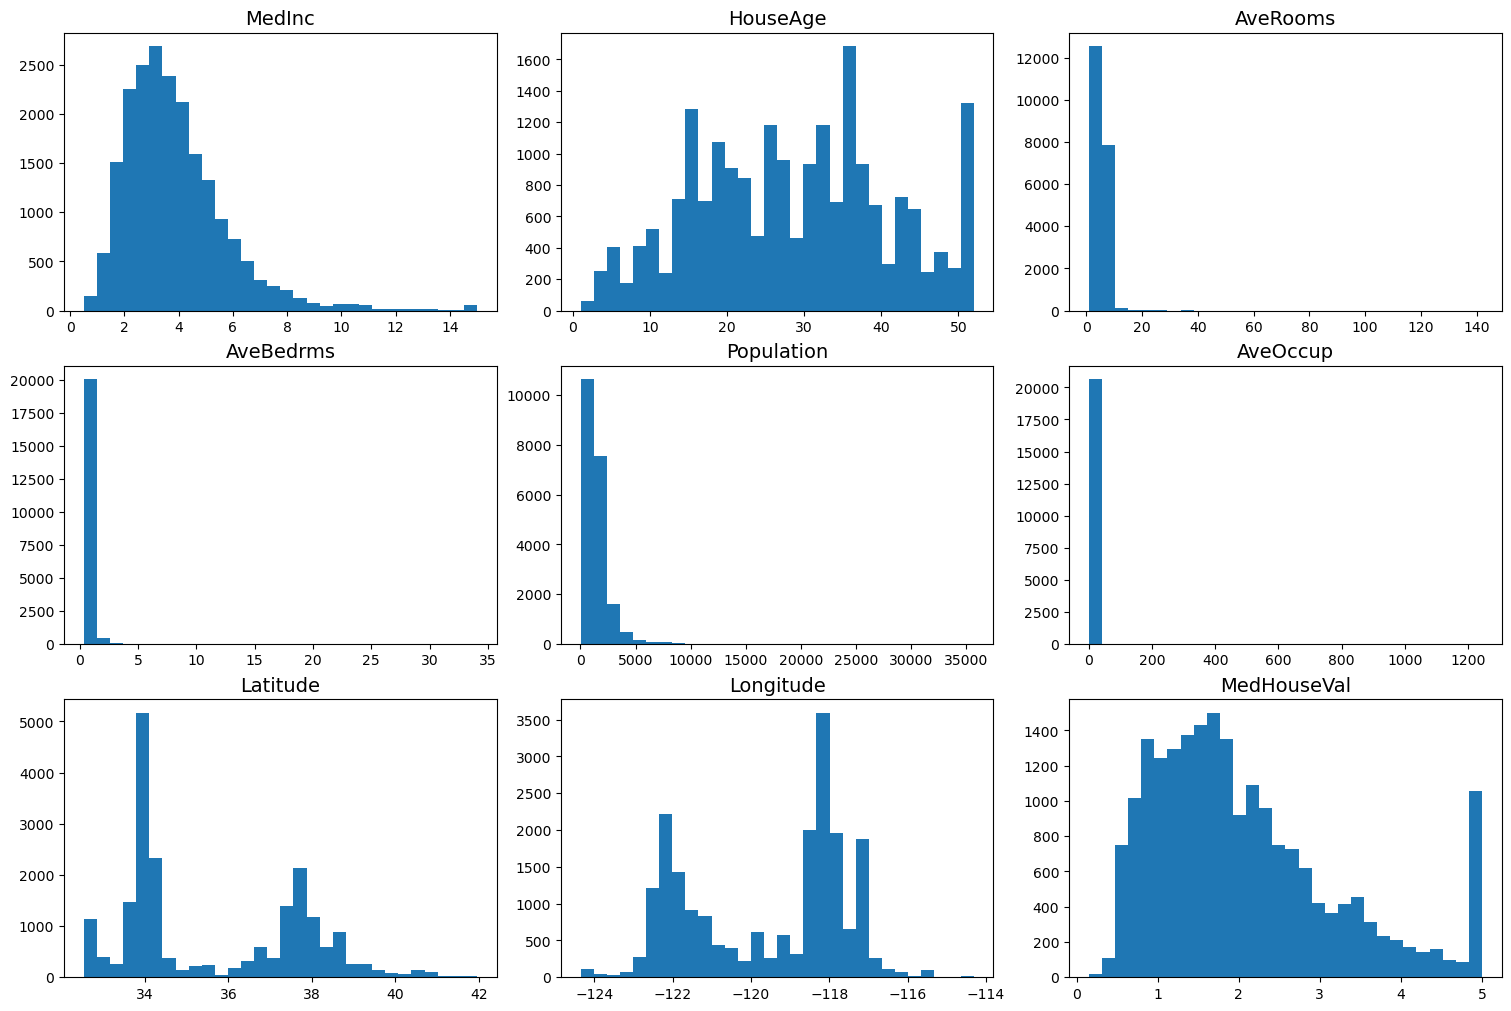

In [6]:
plot_feature_distributions(df_housing, cfg.fig_path, cfg.dpi, cfg.dataset)

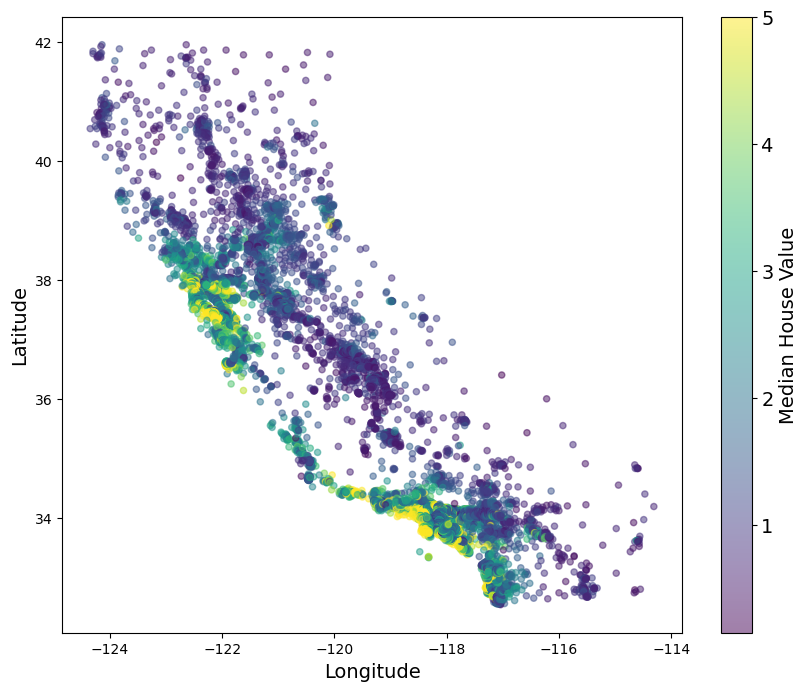

In [7]:
plot_price_by_location(df_housing, cfg.fig_path, cfg.dpi, cfg.dataset)

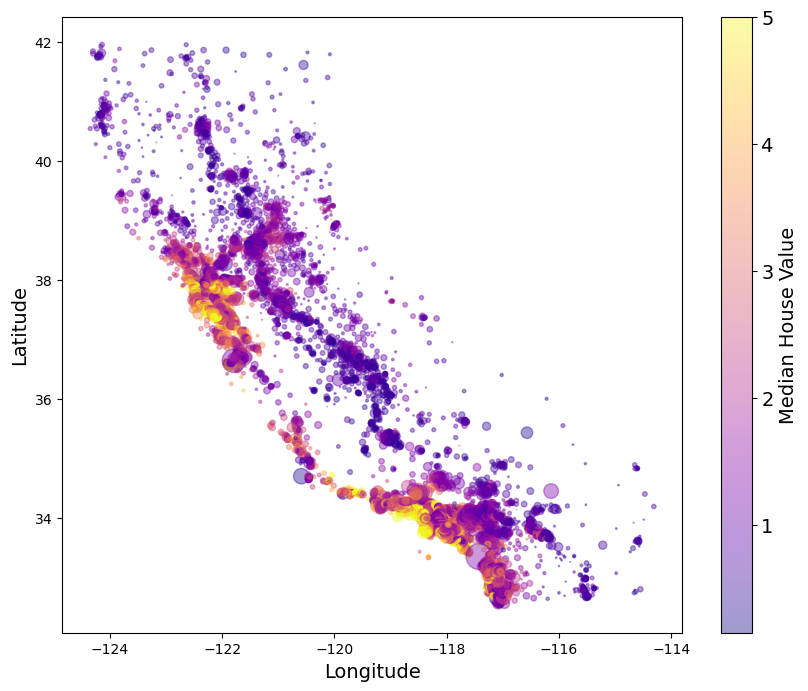

In [8]:
plot_population_and_prices(df_housing, cfg.fig_path, cfg.dpi, cfg.dataset)

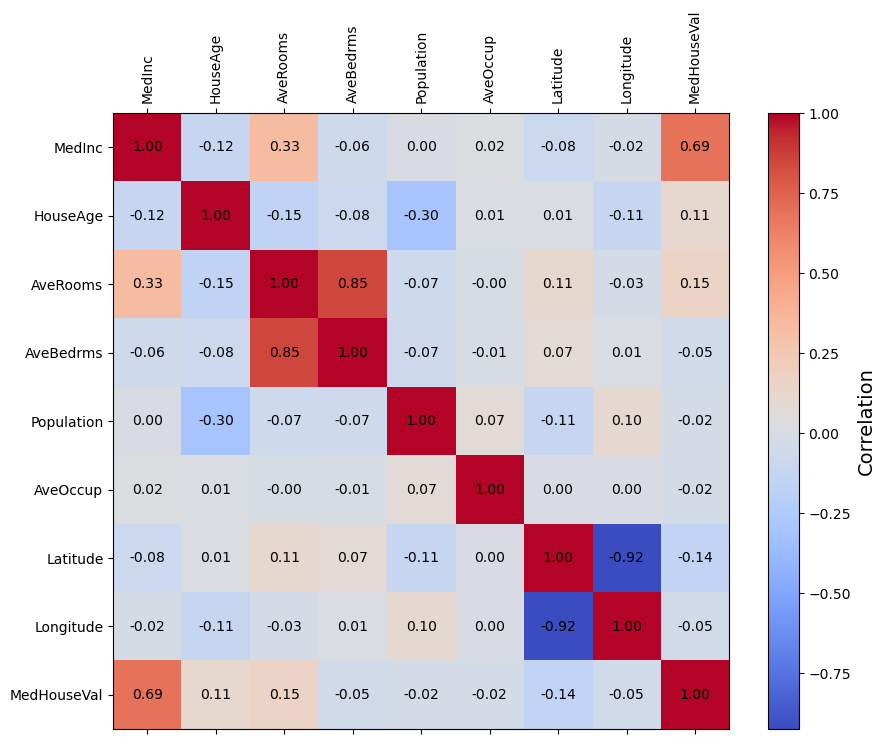

In [9]:
plot_correlation_map(df_housing, cfg.fig_path, cfg.dpi, cfg.dataset)

## Training

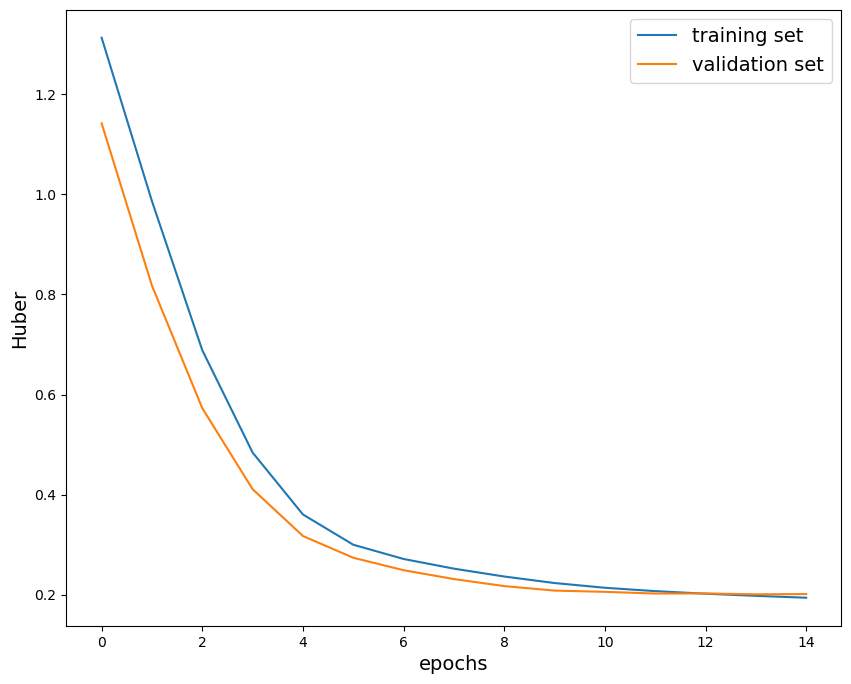

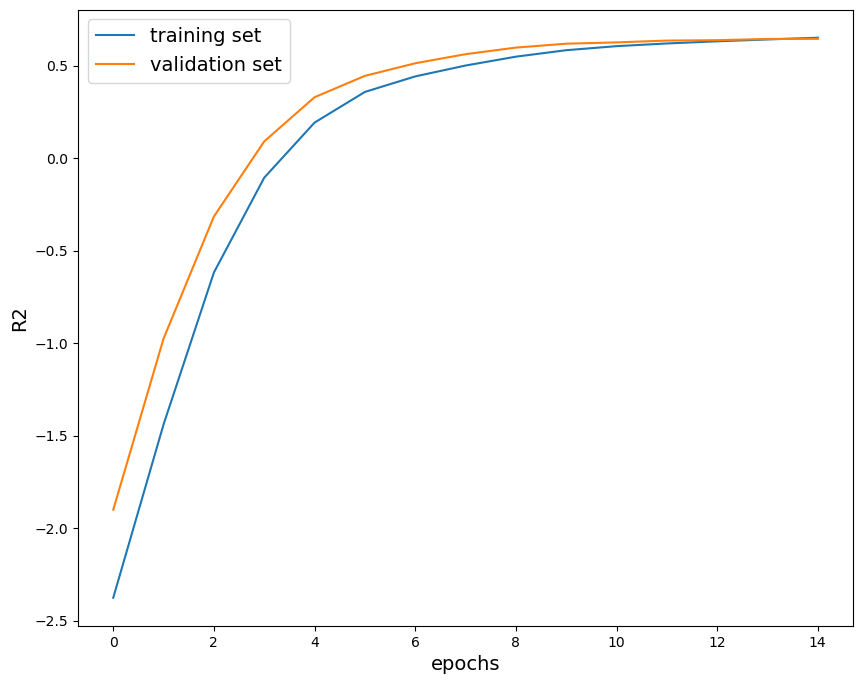

In [10]:
test_metrics = model_pipeline(prms, cfg, fpath, device, show=False, plot=True)

params #1: (0.01, 32, 0.0)


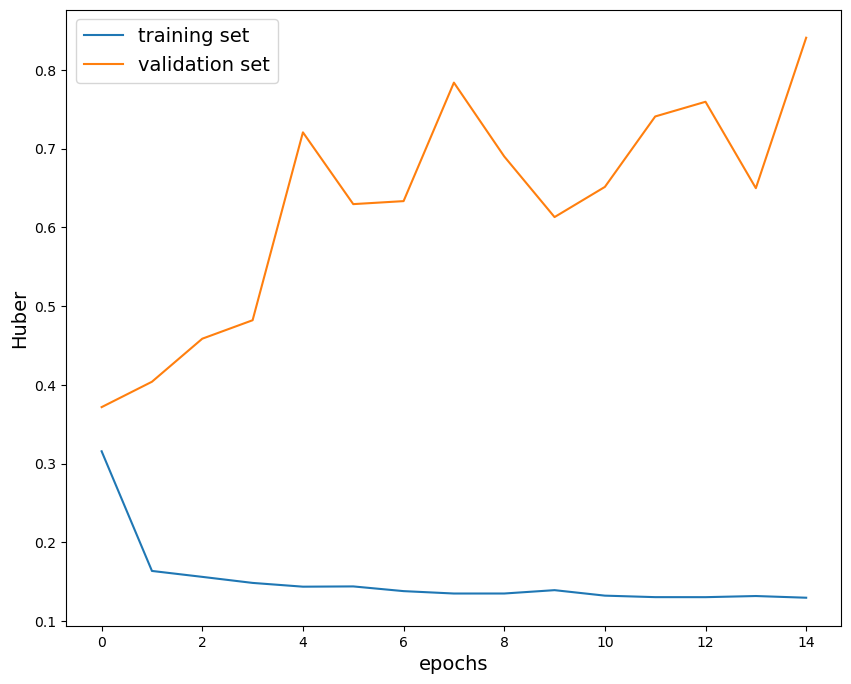

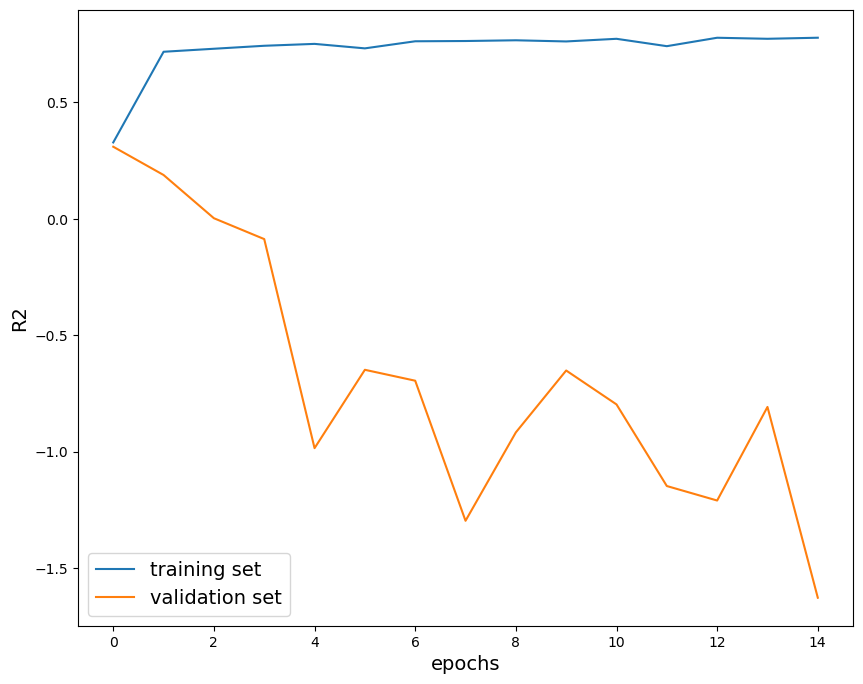

params #2: (0.01, 32, 0.3)


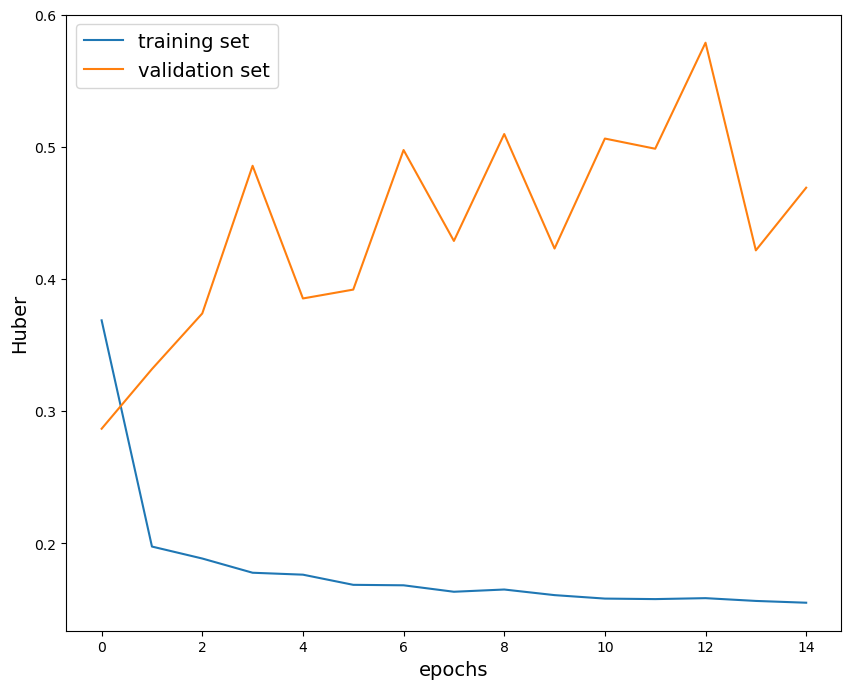

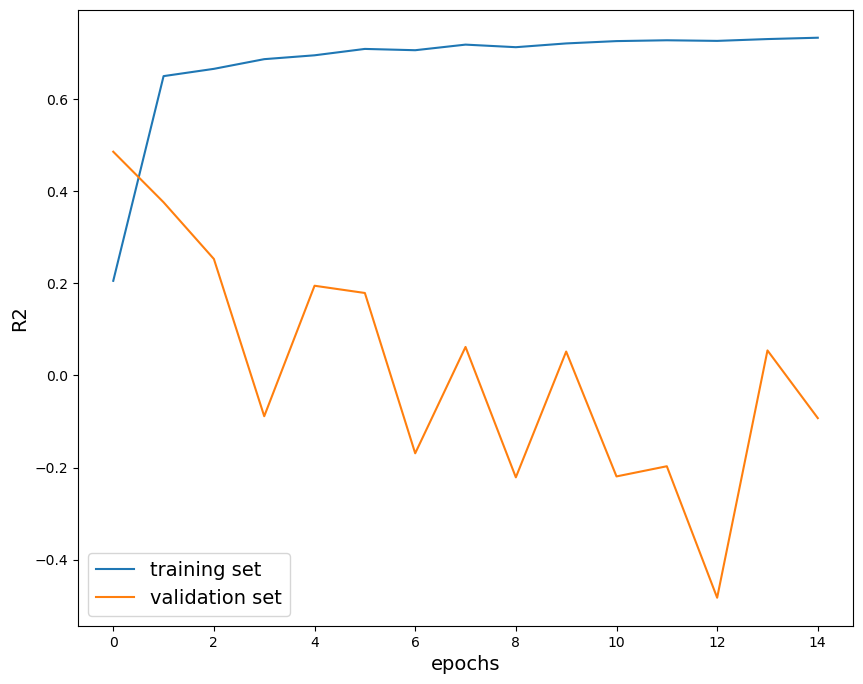

params #3: (0.01, 32, 0.6)


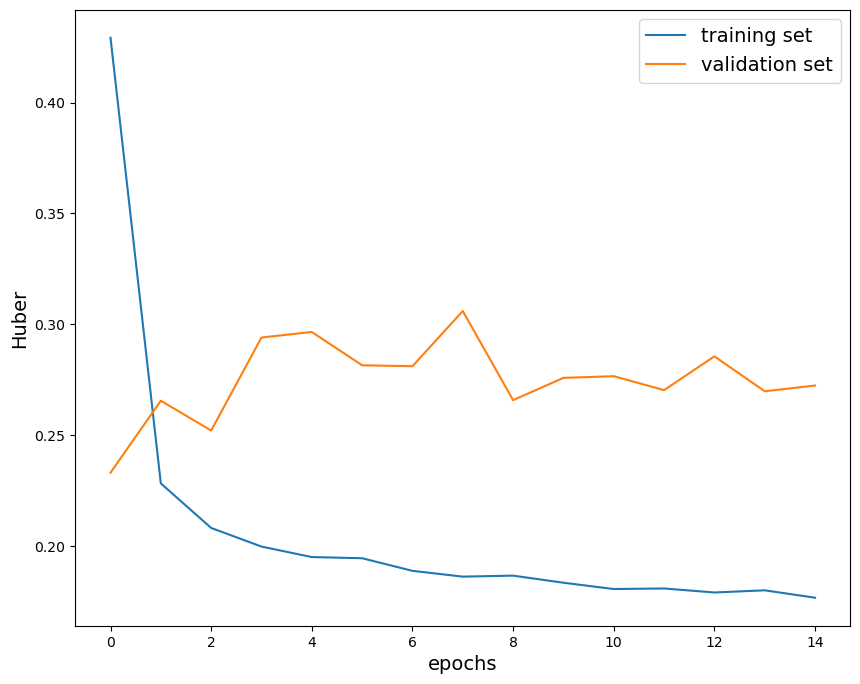

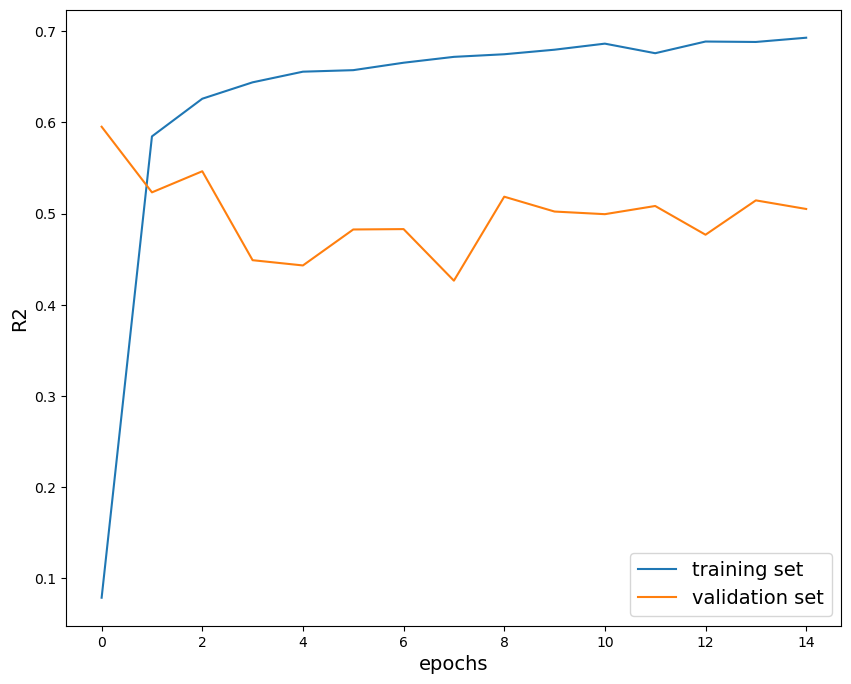

params #4: (0.01, 64, 0.0)


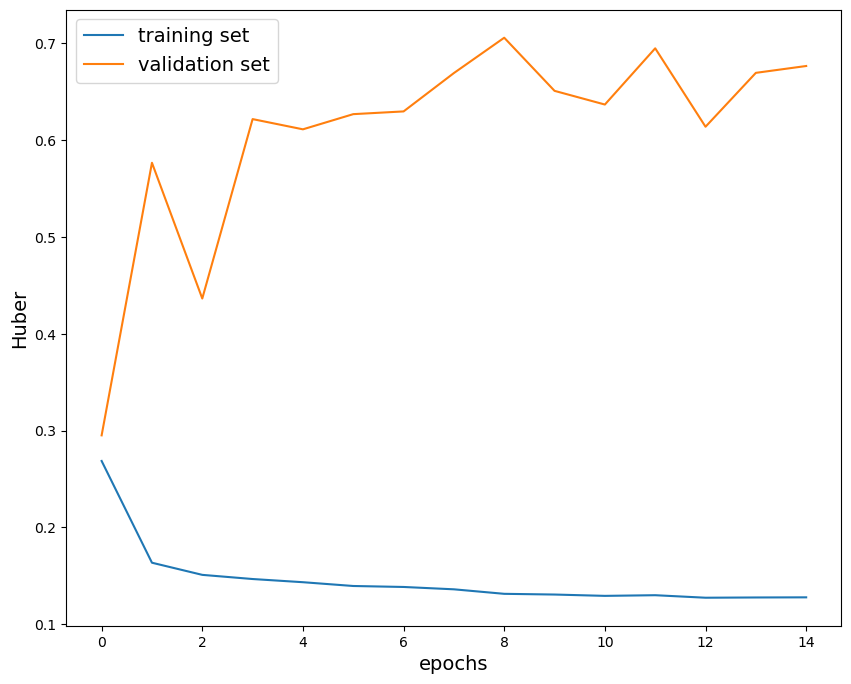

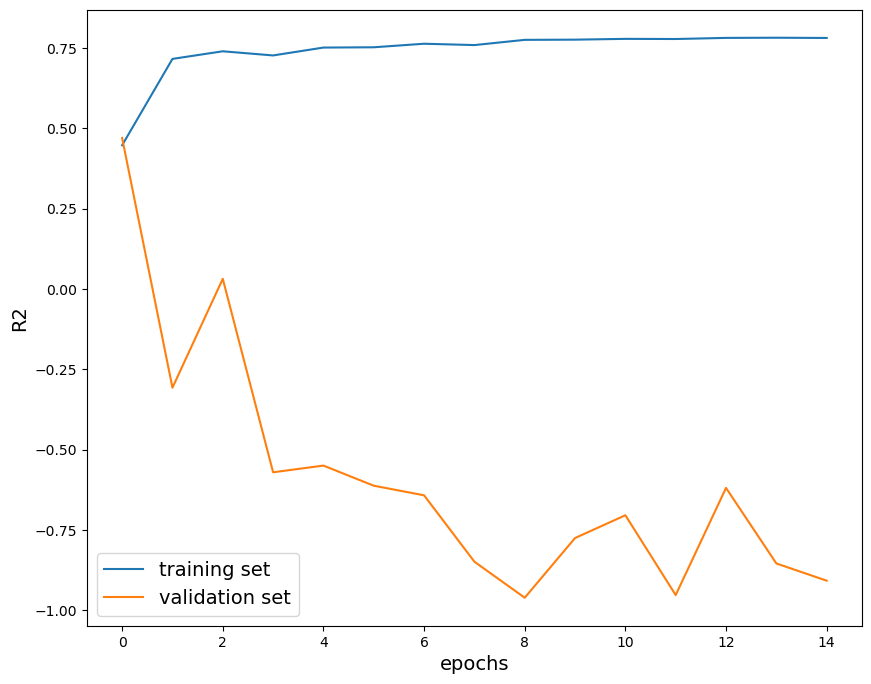

params #5: (0.01, 64, 0.3)


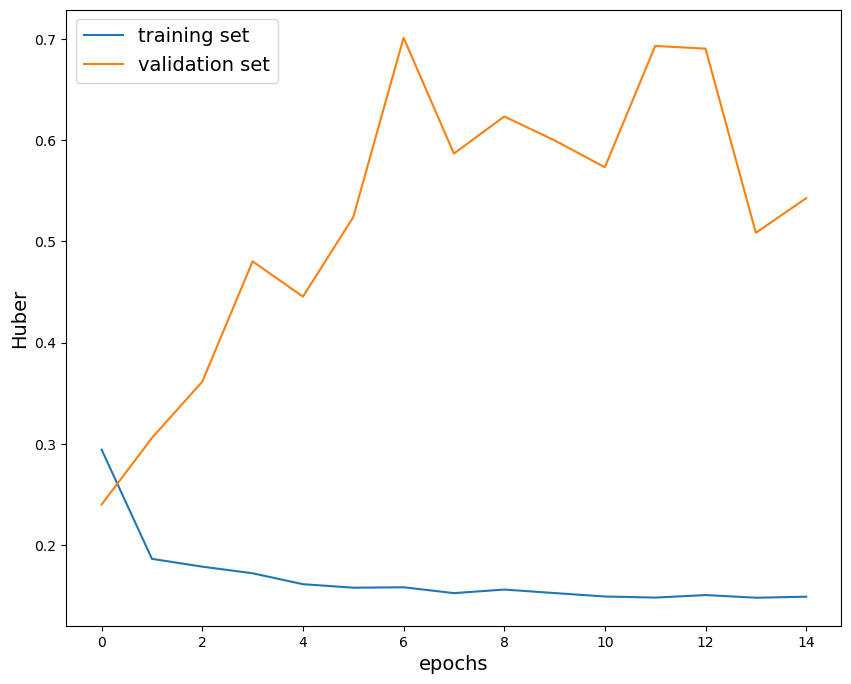

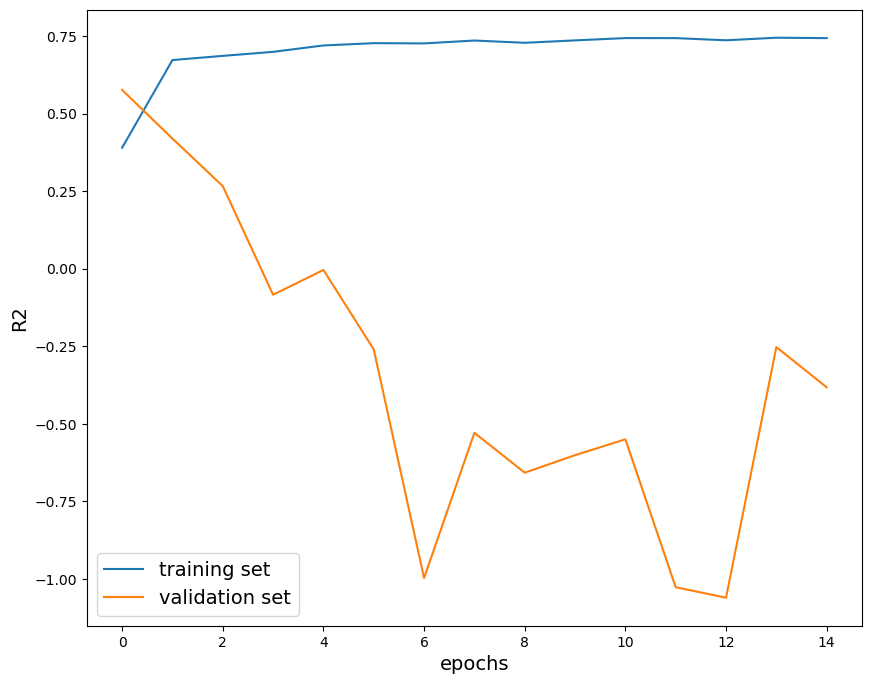

params #6: (0.01, 64, 0.6)


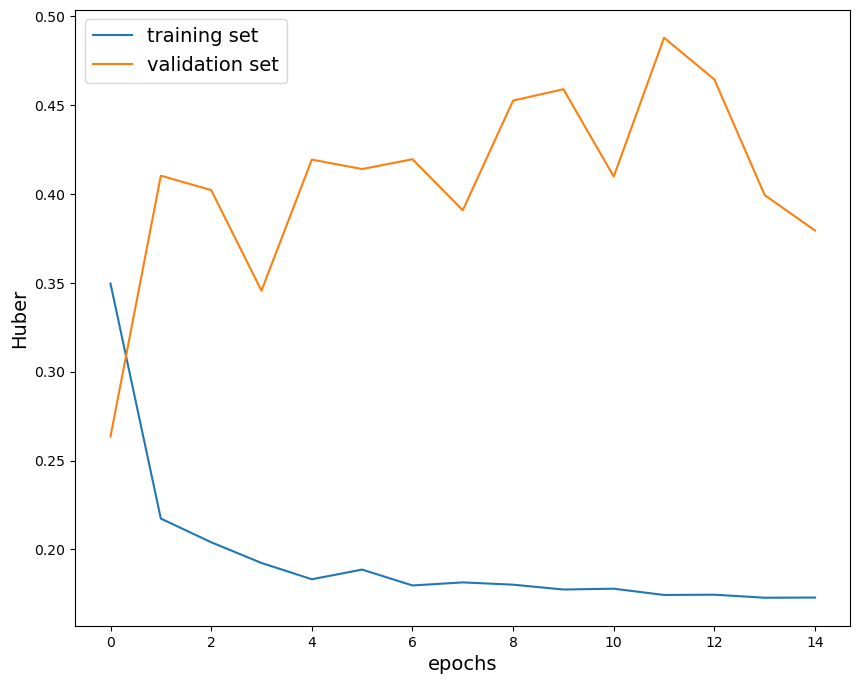

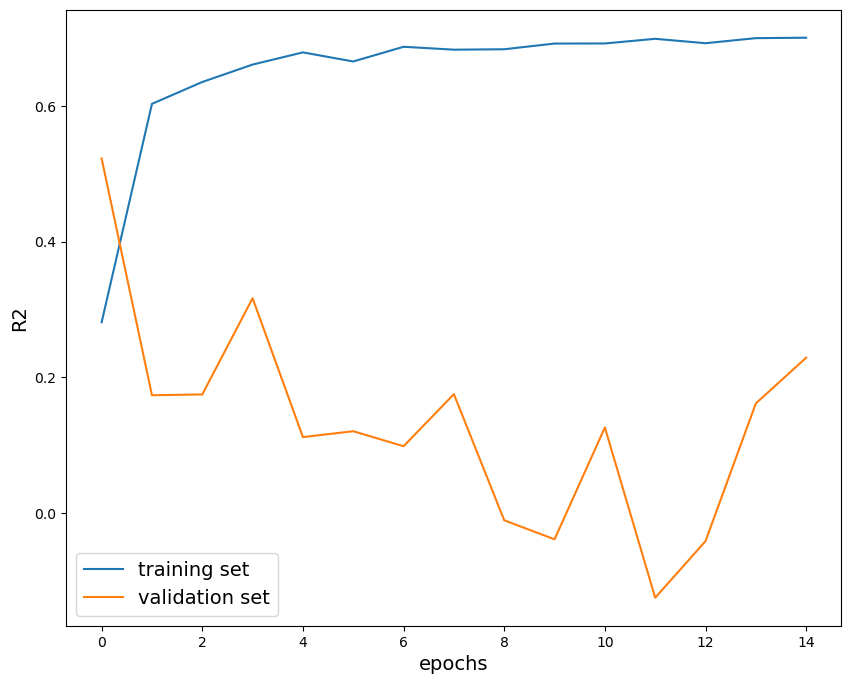

params #7: (0.01, 128, 0.0)


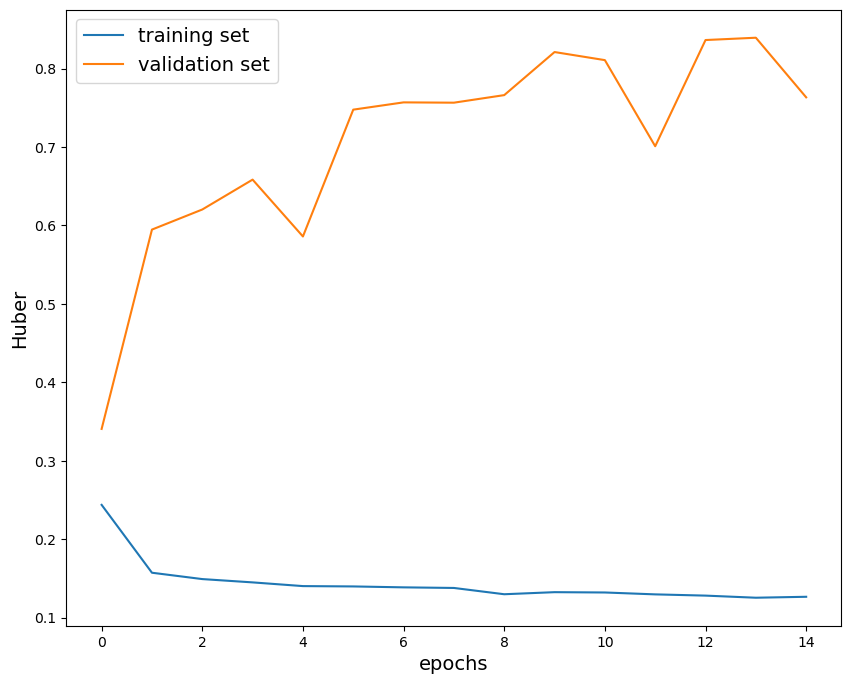

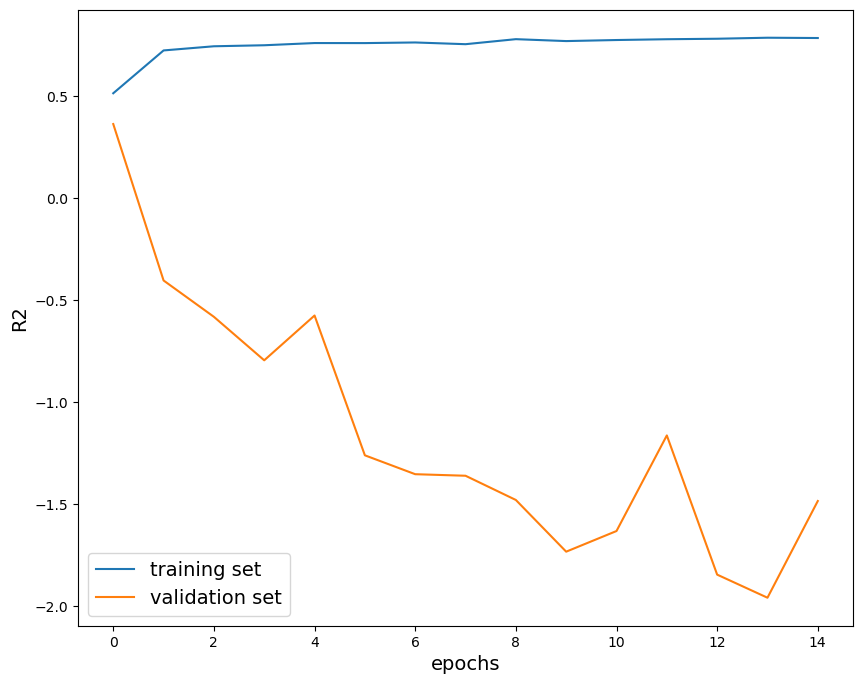

params #8: (0.01, 128, 0.3)


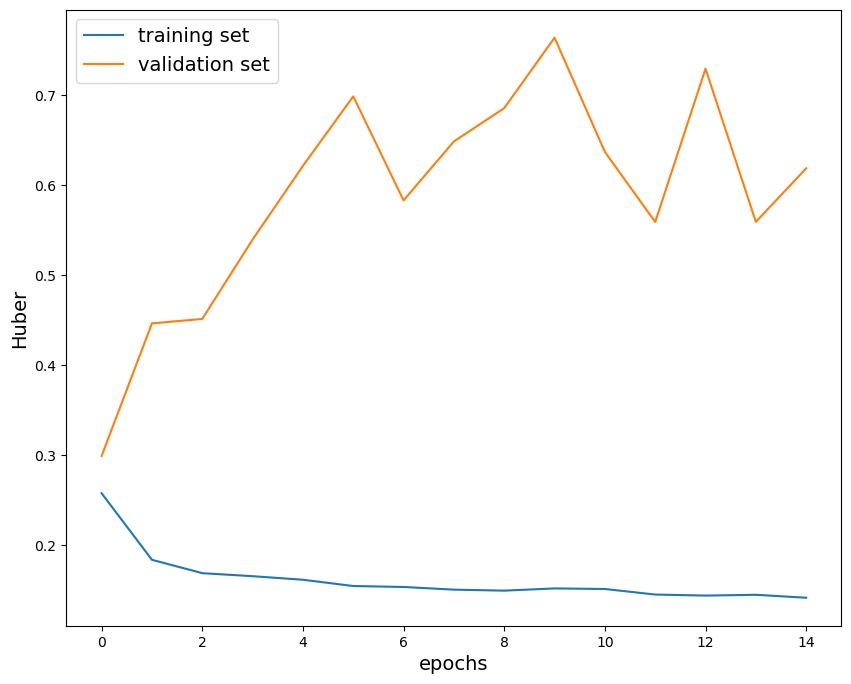

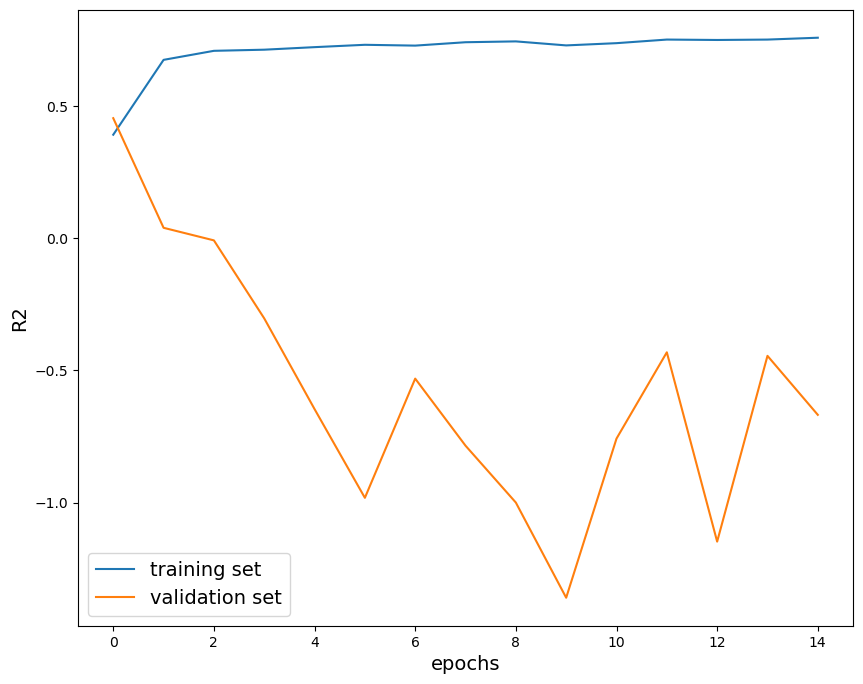

params #9: (0.01, 128, 0.6)


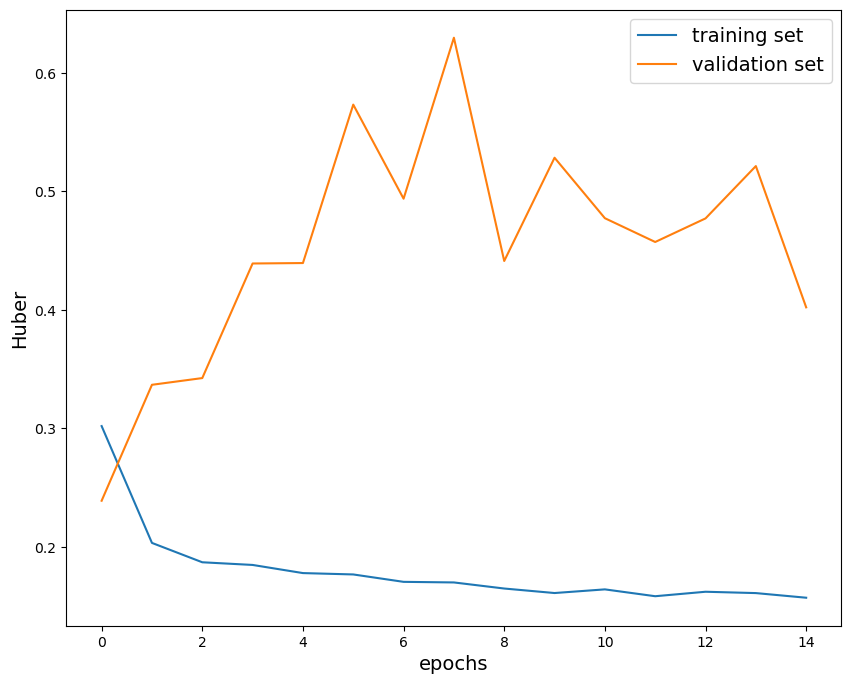

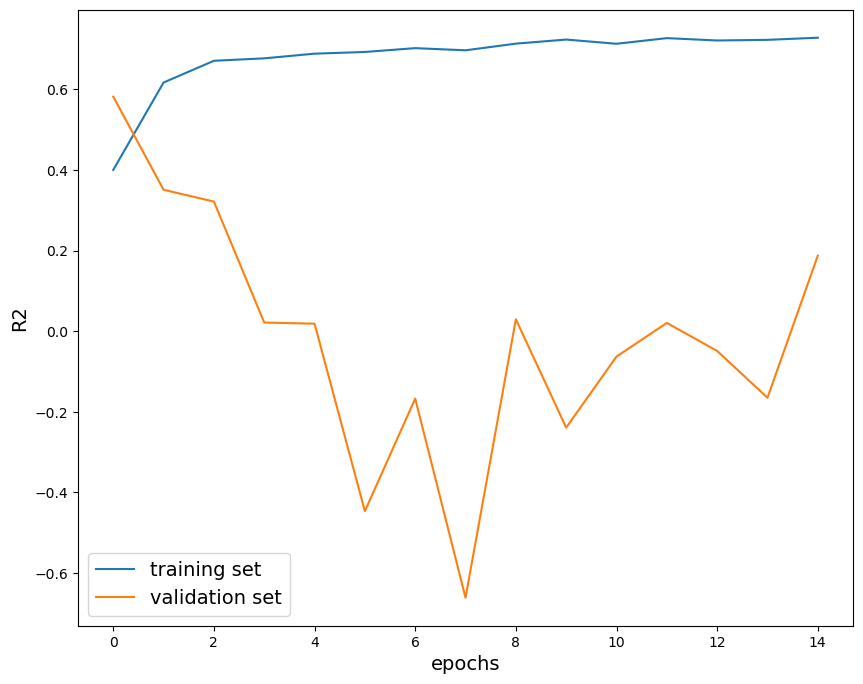

params #10: (0.001, 32, 0.0)


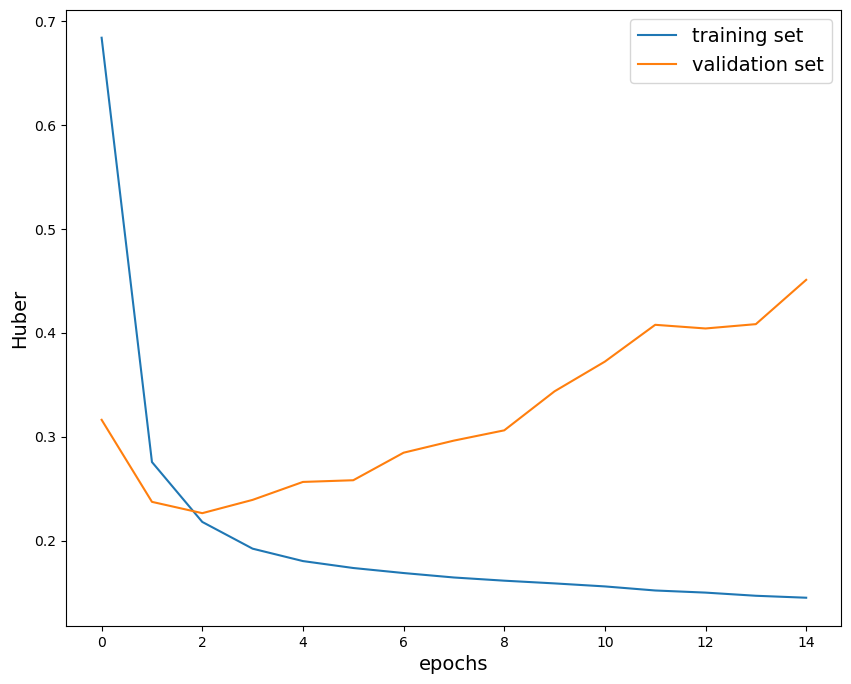

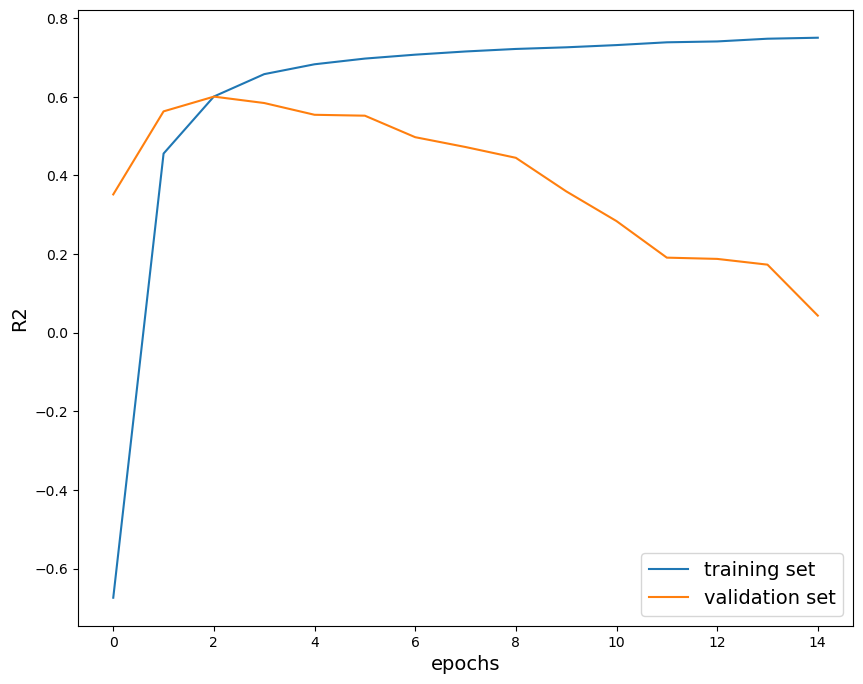

params #11: (0.001, 32, 0.3)


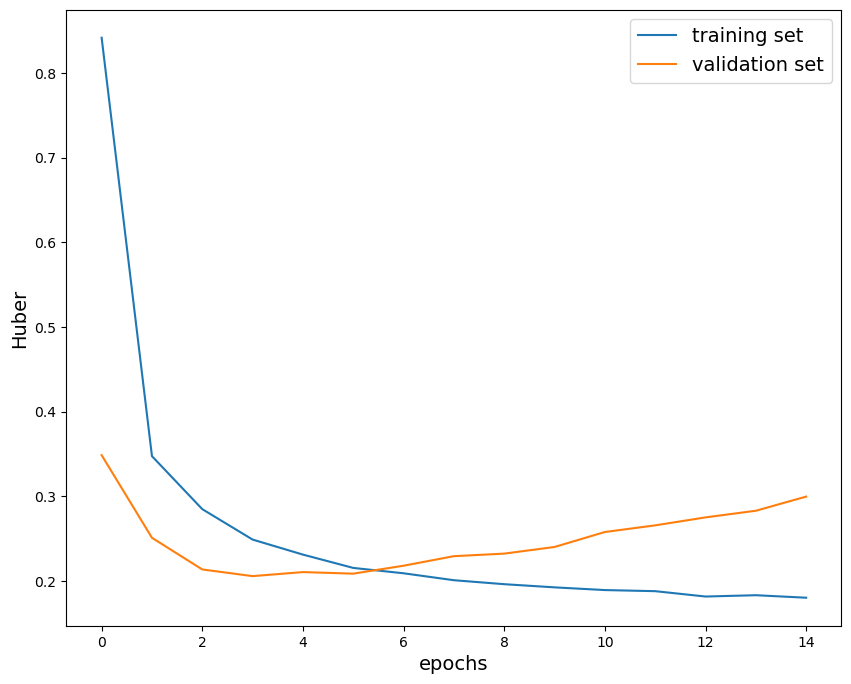

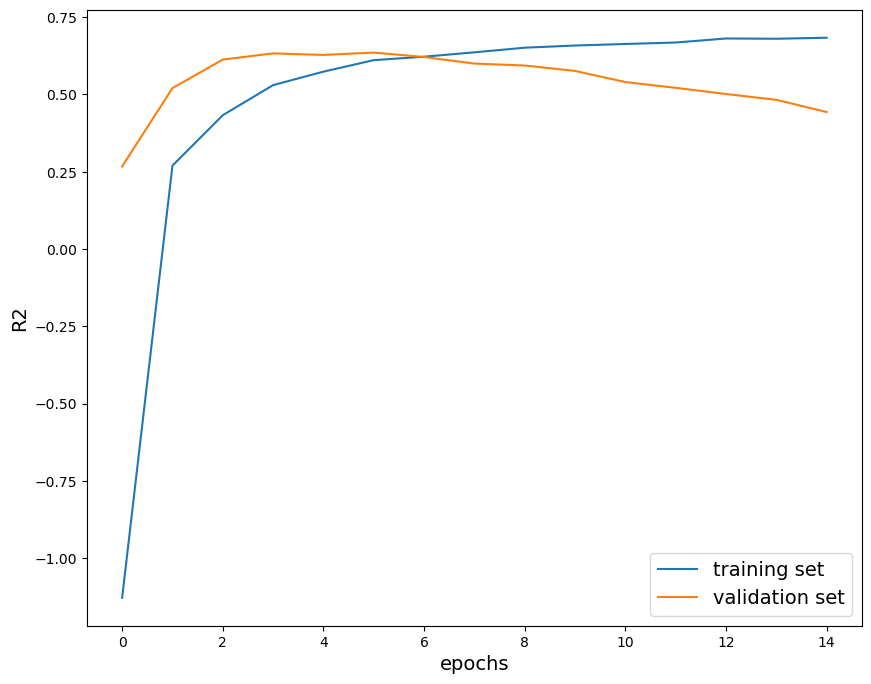

params #12: (0.001, 32, 0.6)


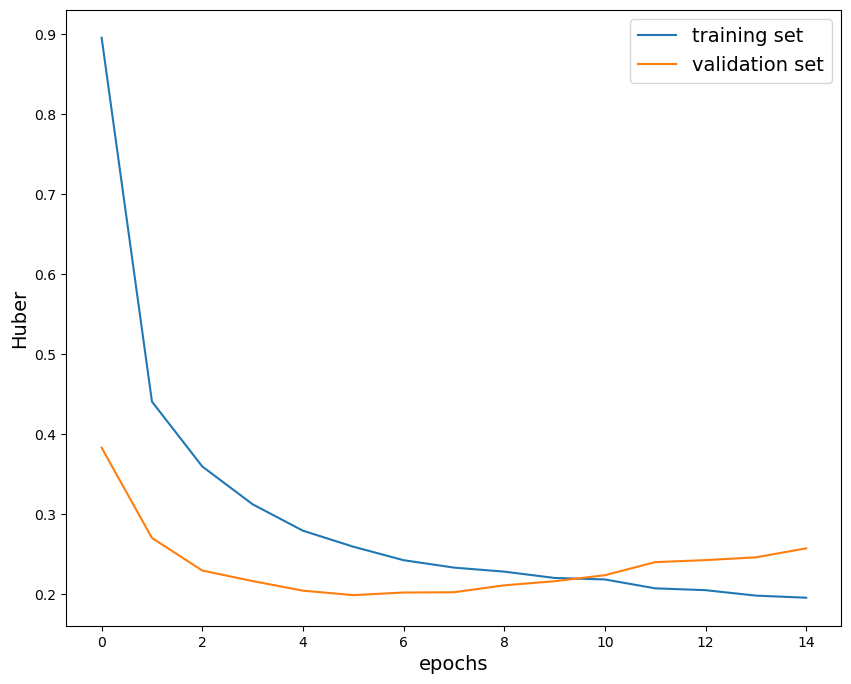

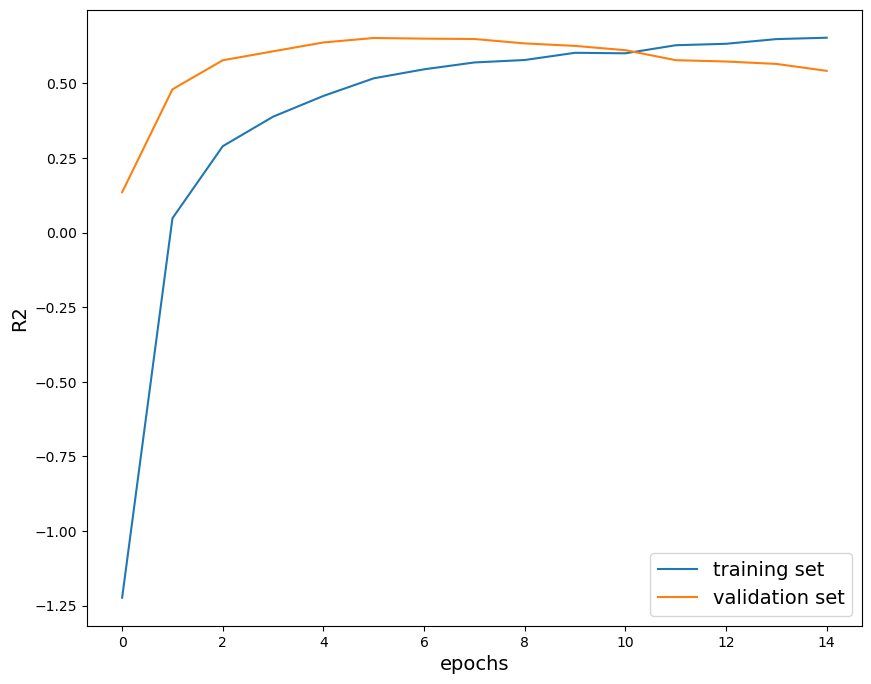

params #13: (0.001, 64, 0.0)


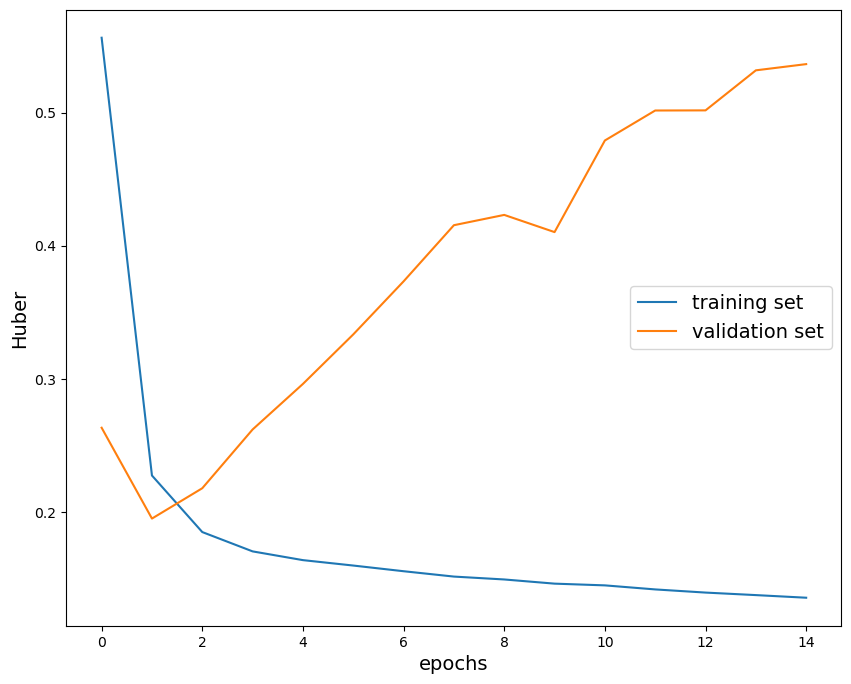

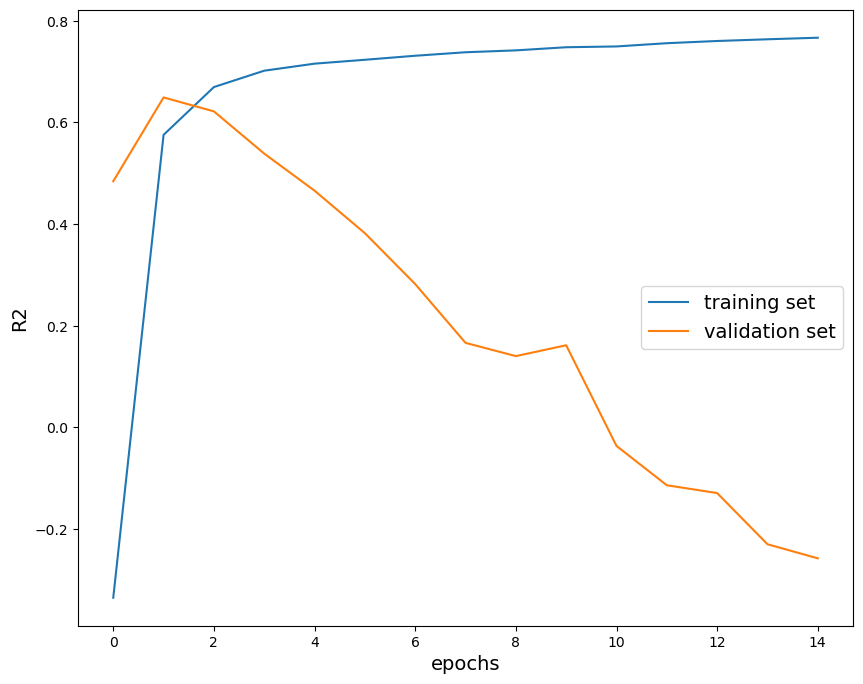

params #14: (0.001, 64, 0.3)


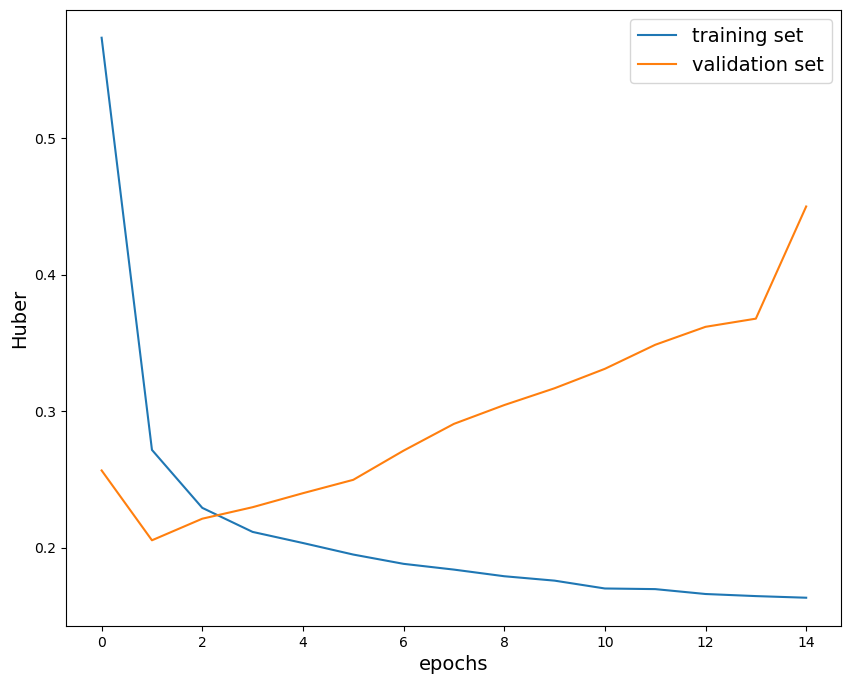

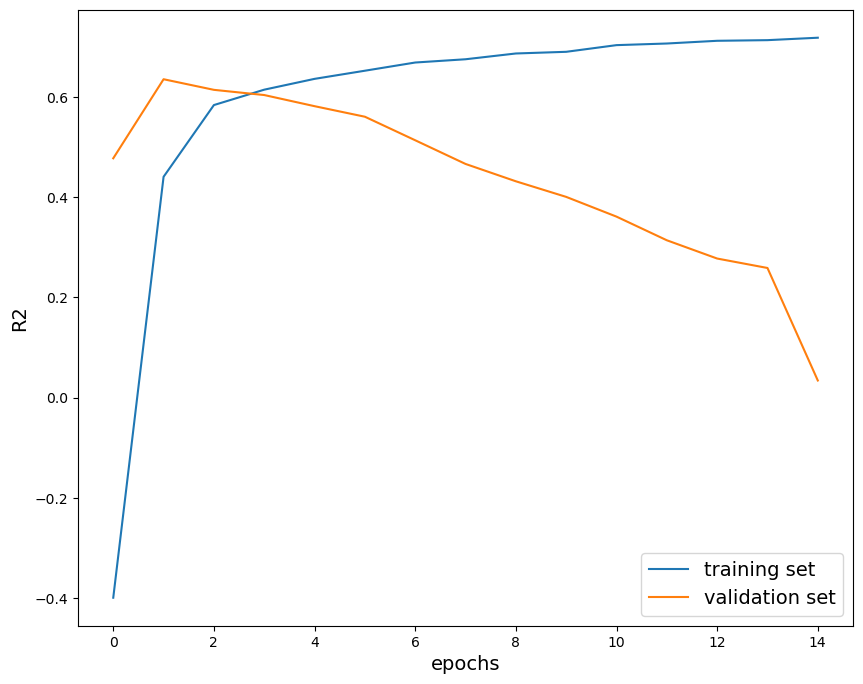

params #15: (0.001, 64, 0.6)


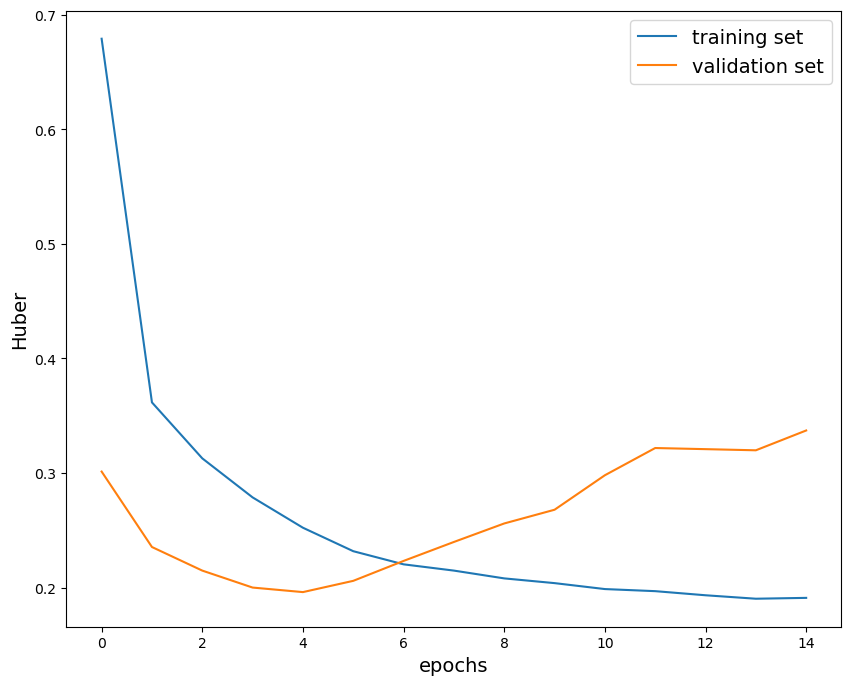

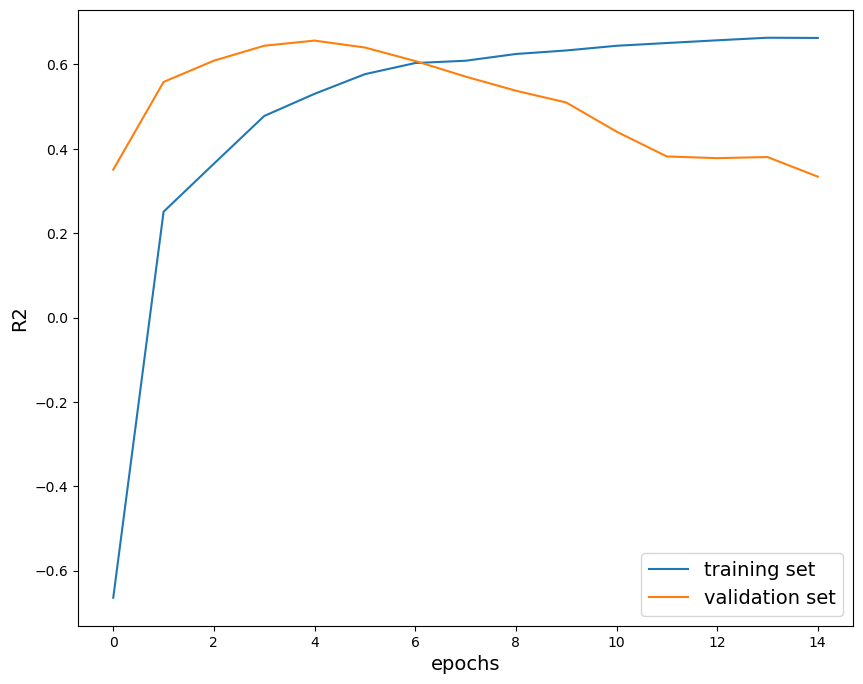

params #16: (0.001, 128, 0.0)


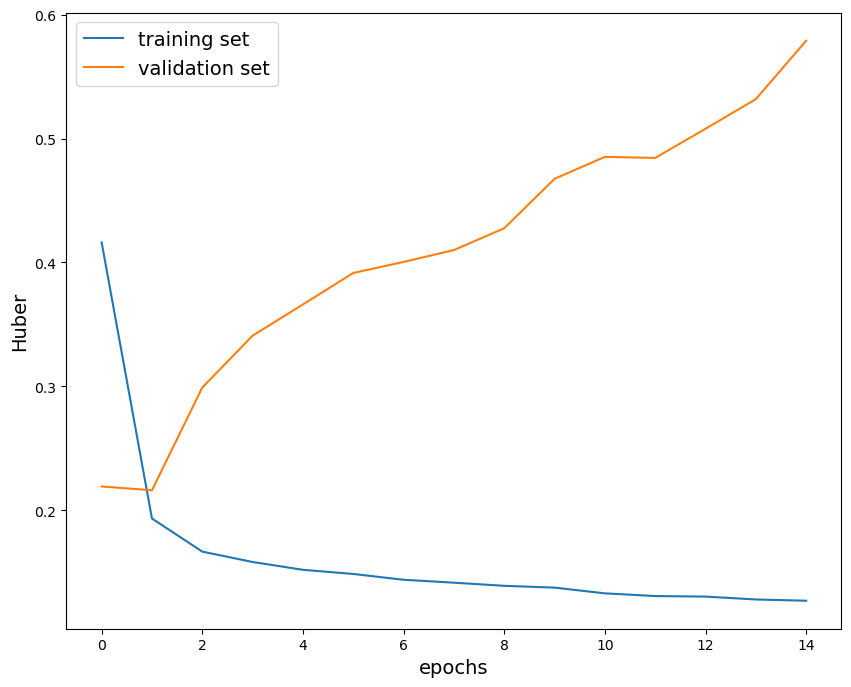

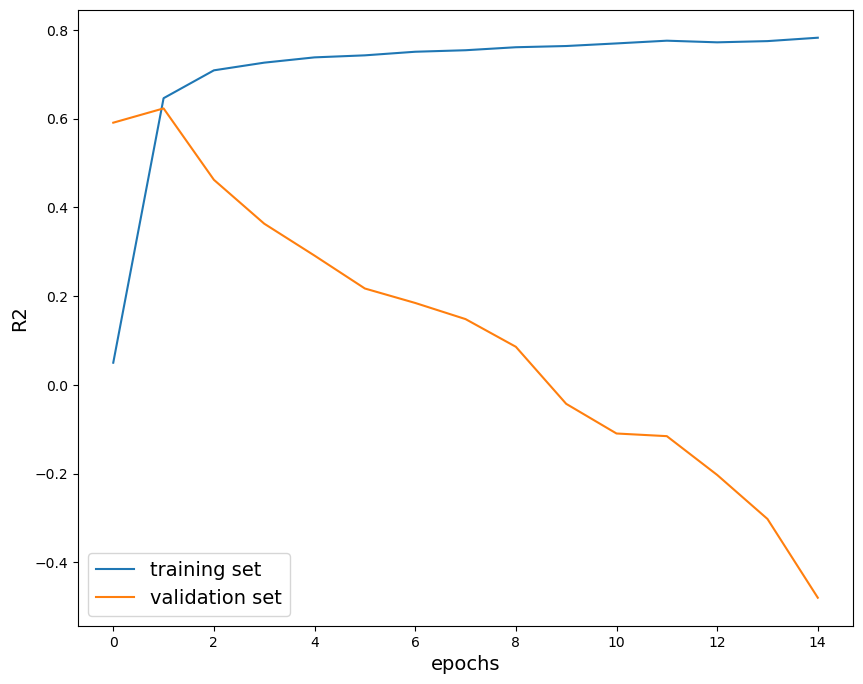

params #17: (0.001, 128, 0.3)


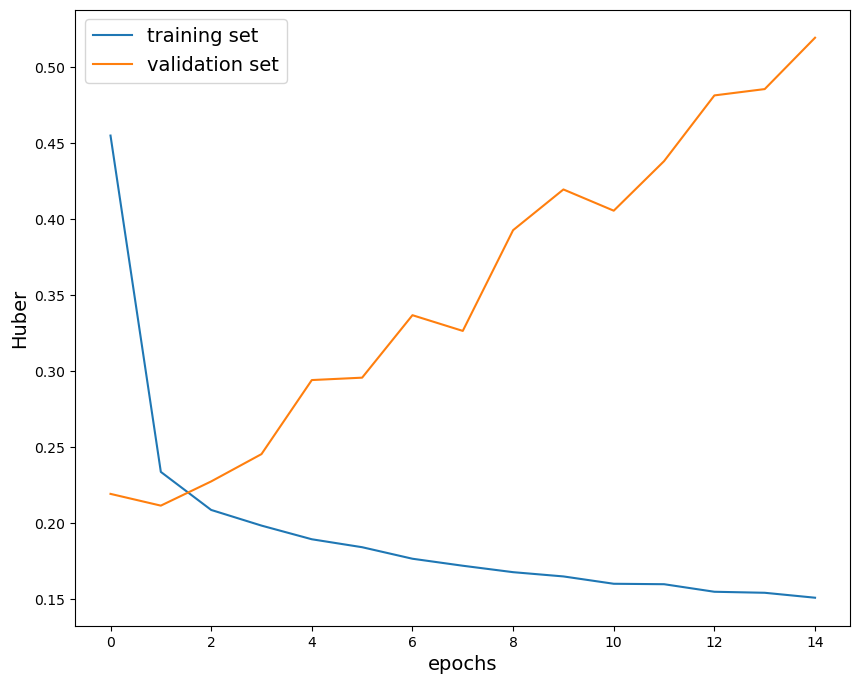

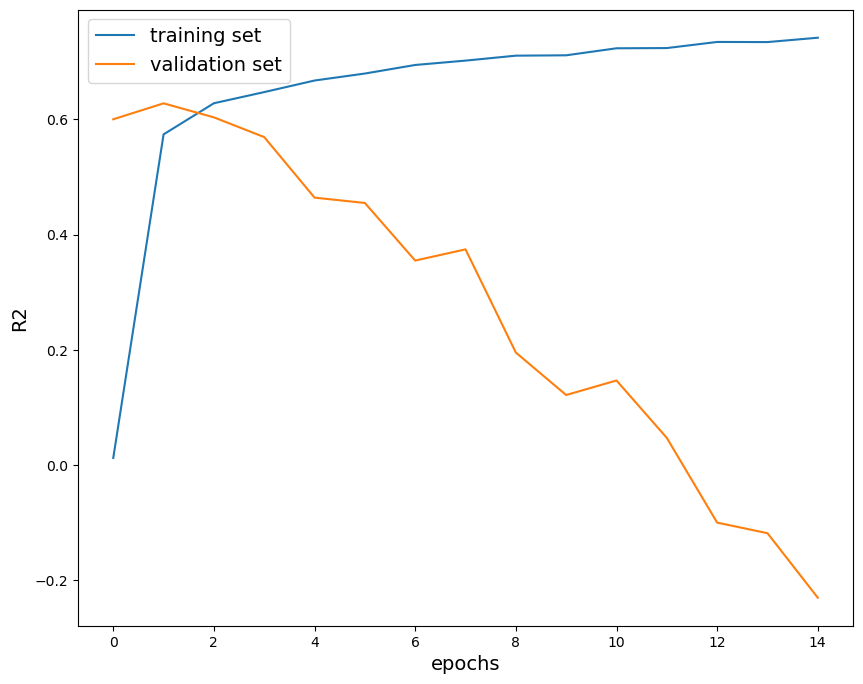

params #18: (0.001, 128, 0.6)


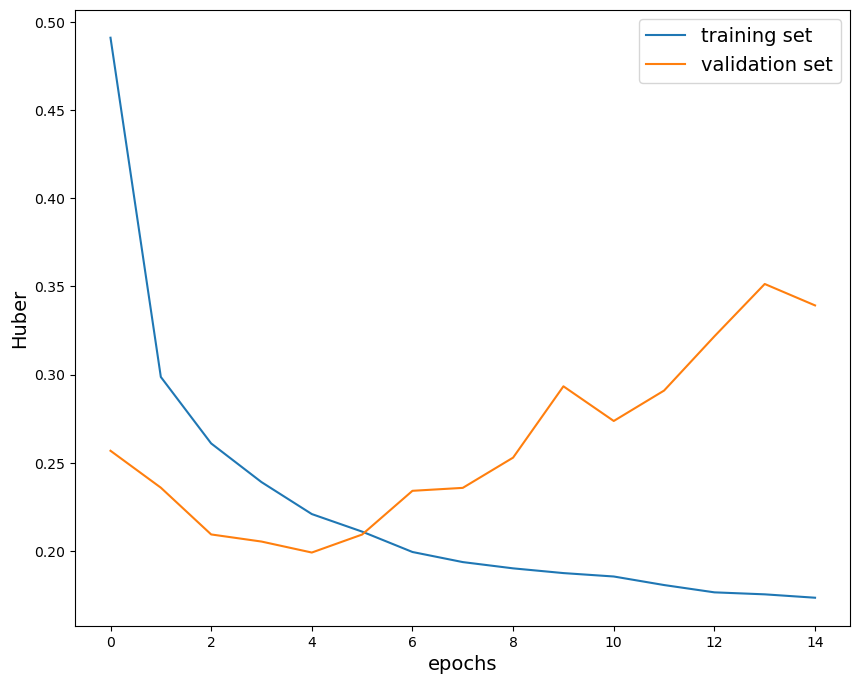

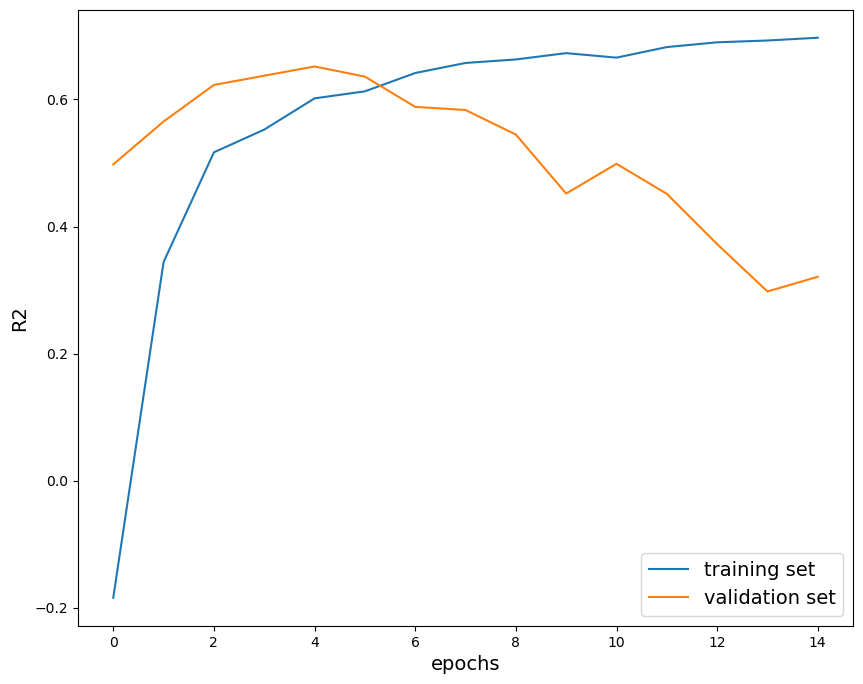

params #19: (0.0001, 32, 0.0)


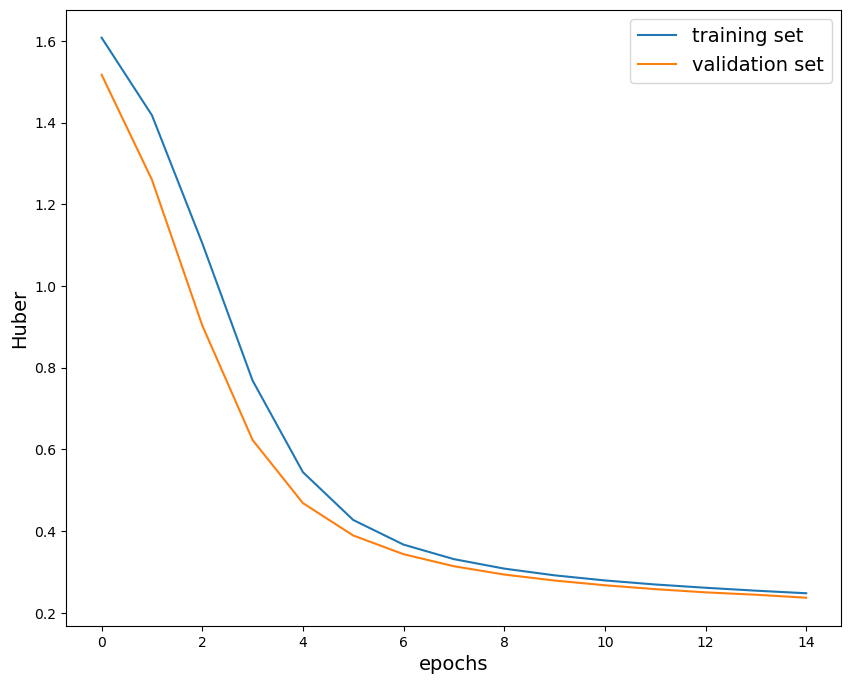

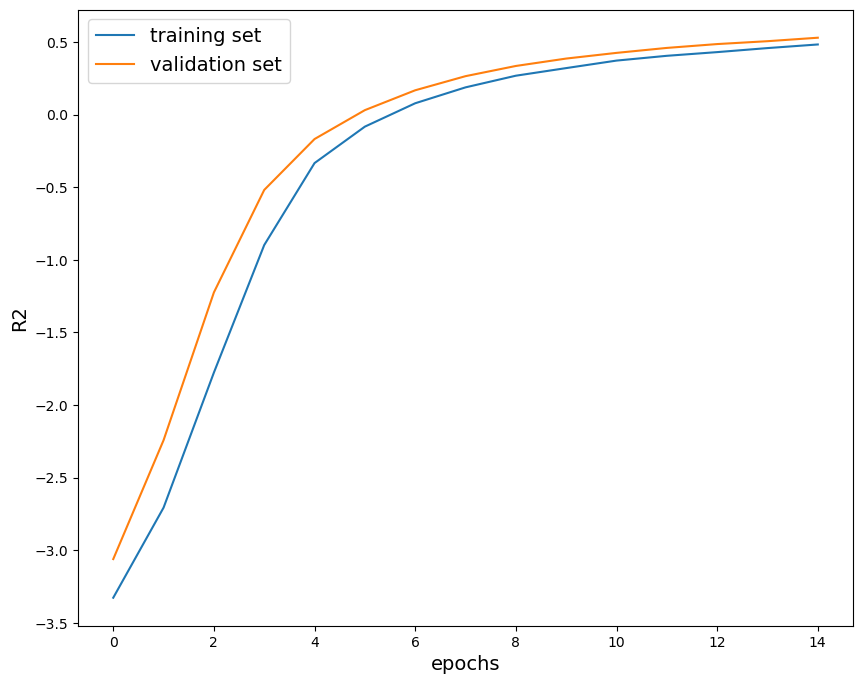

params #20: (0.0001, 32, 0.3)


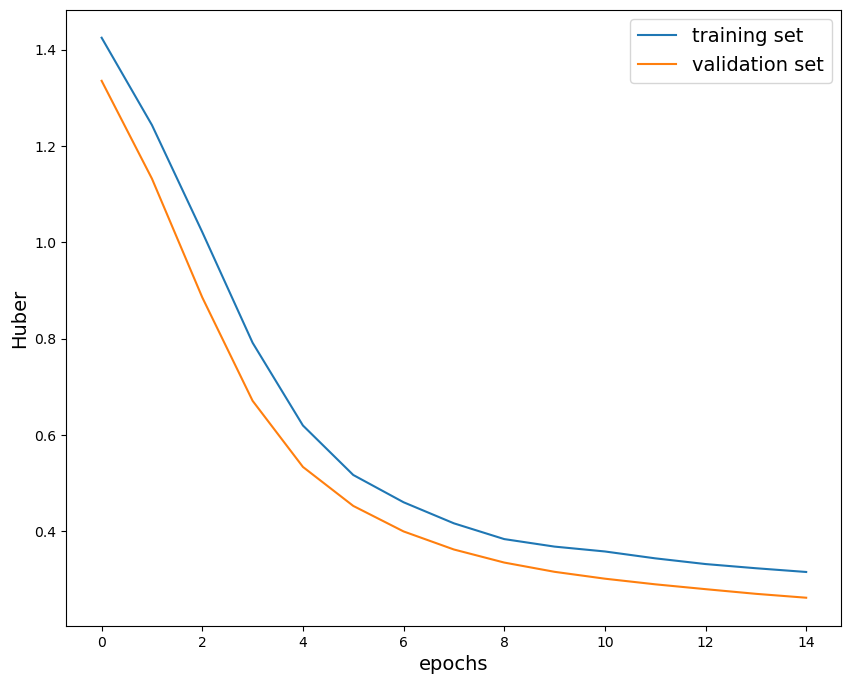

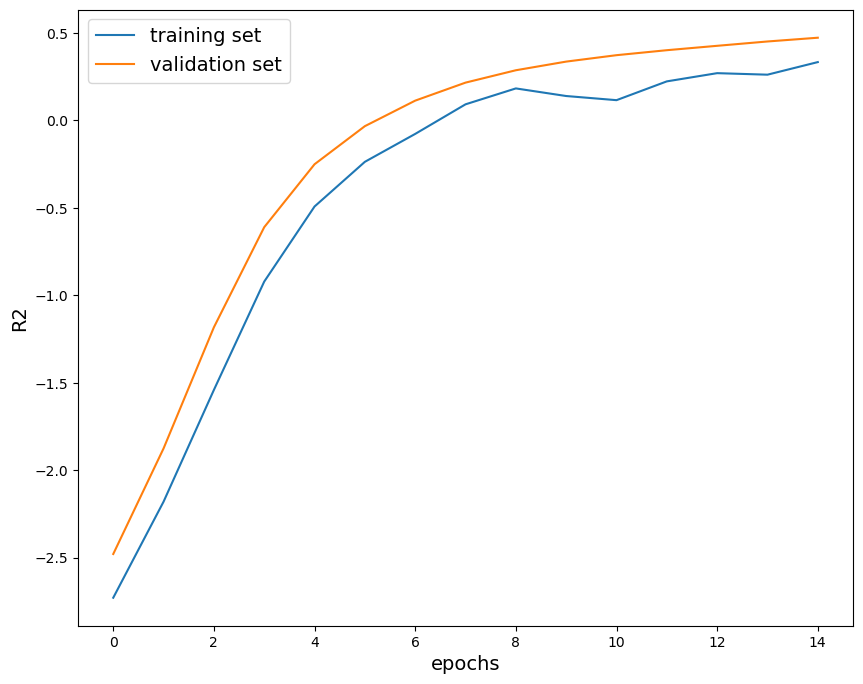

params #21: (0.0001, 32, 0.6)


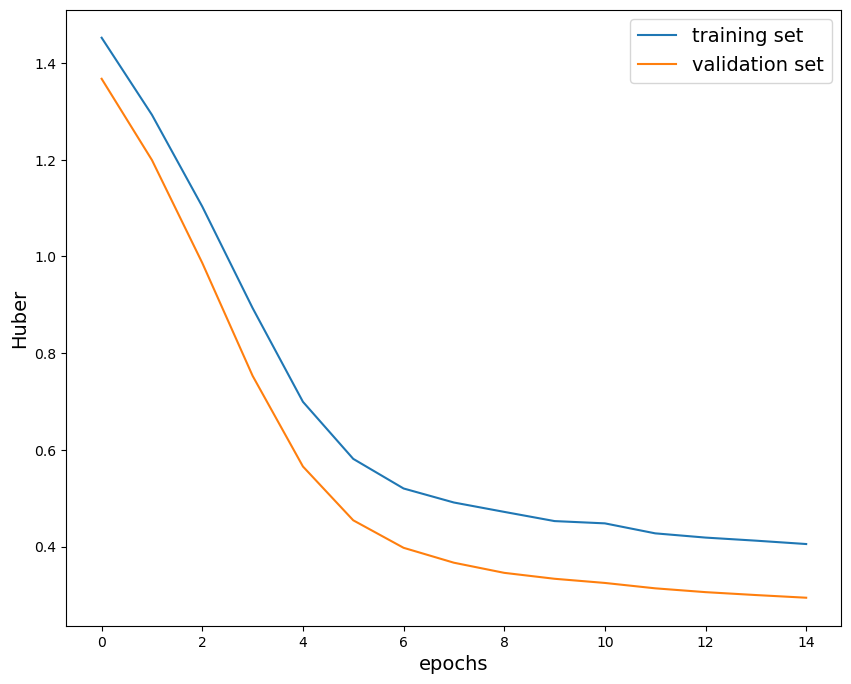

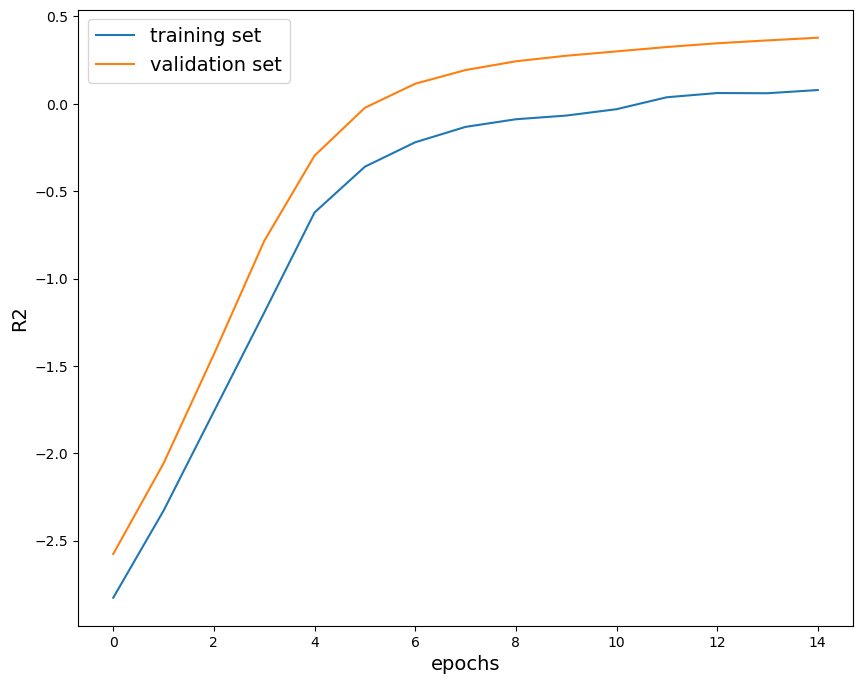

params #22: (0.0001, 64, 0.0)


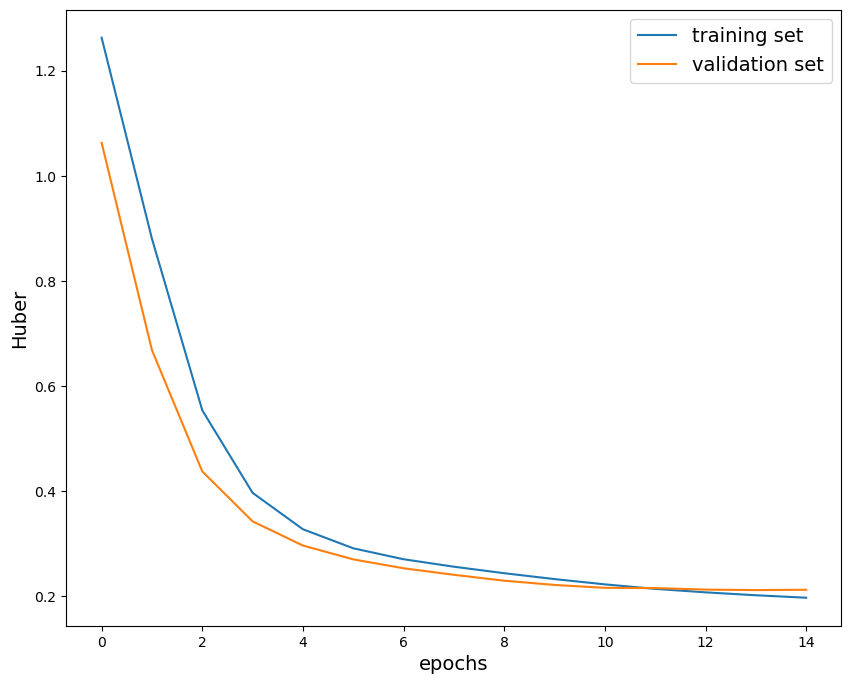

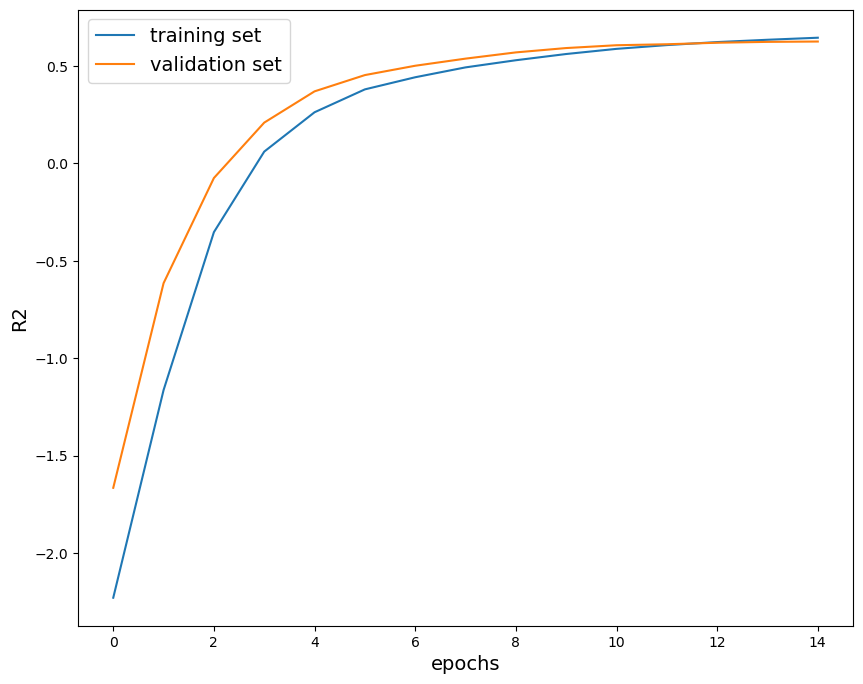

params #23: (0.0001, 64, 0.3)


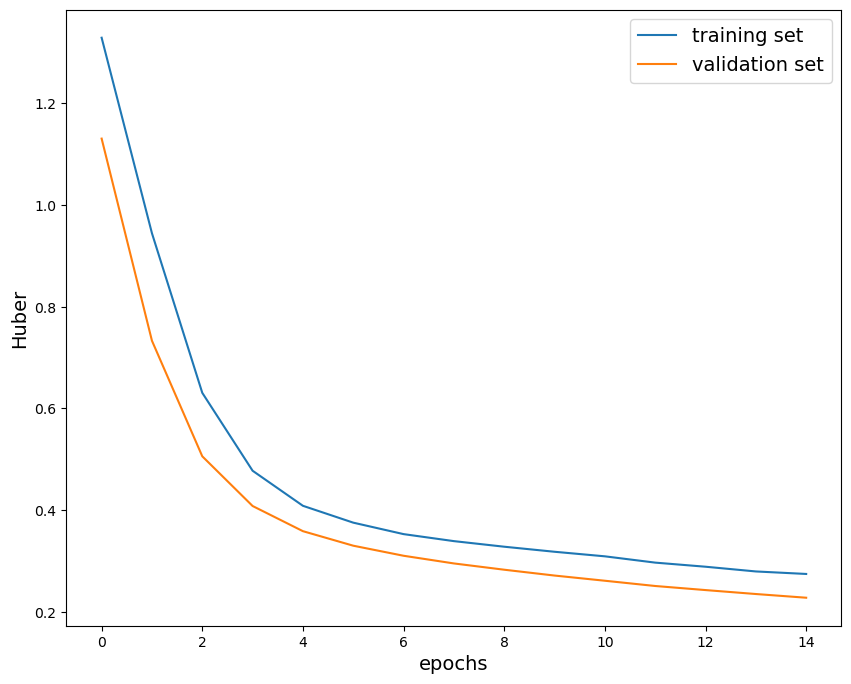

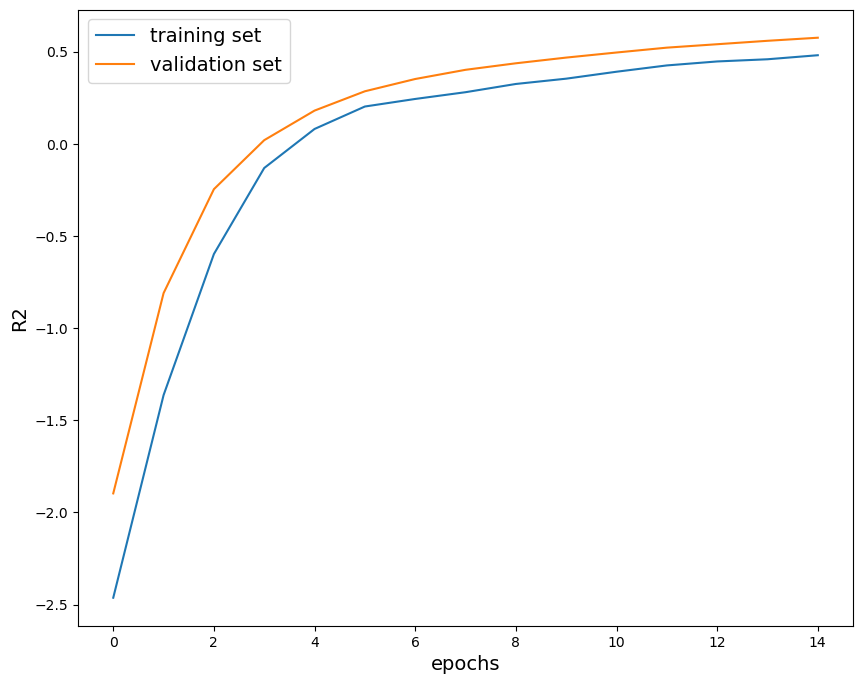

params #24: (0.0001, 64, 0.6)


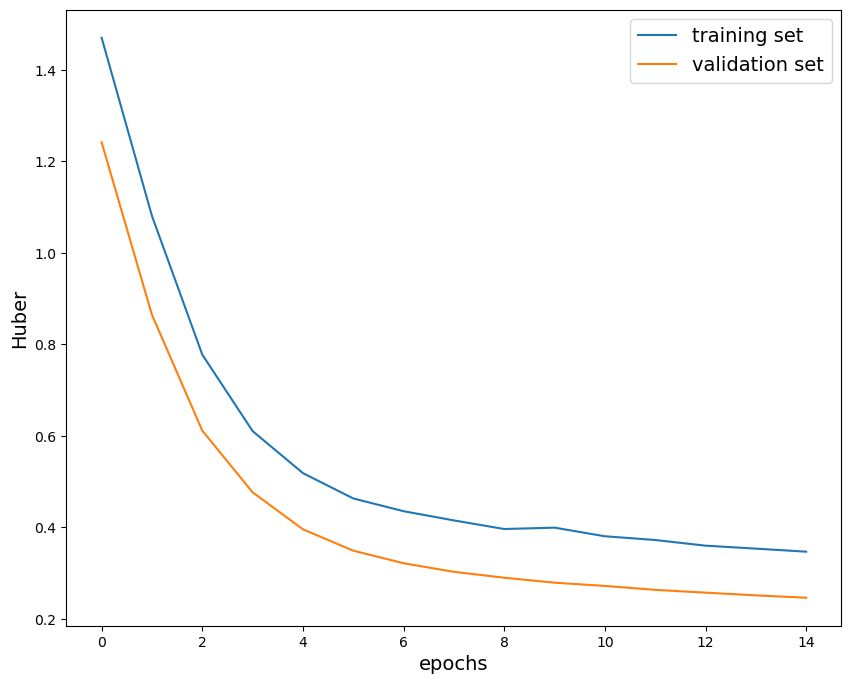

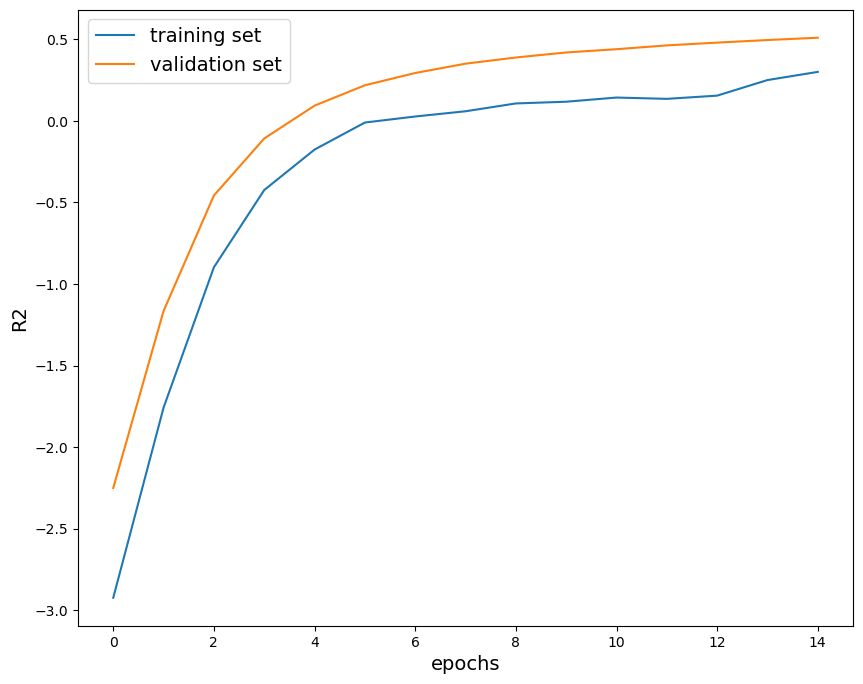

params #25: (0.0001, 128, 0.0)


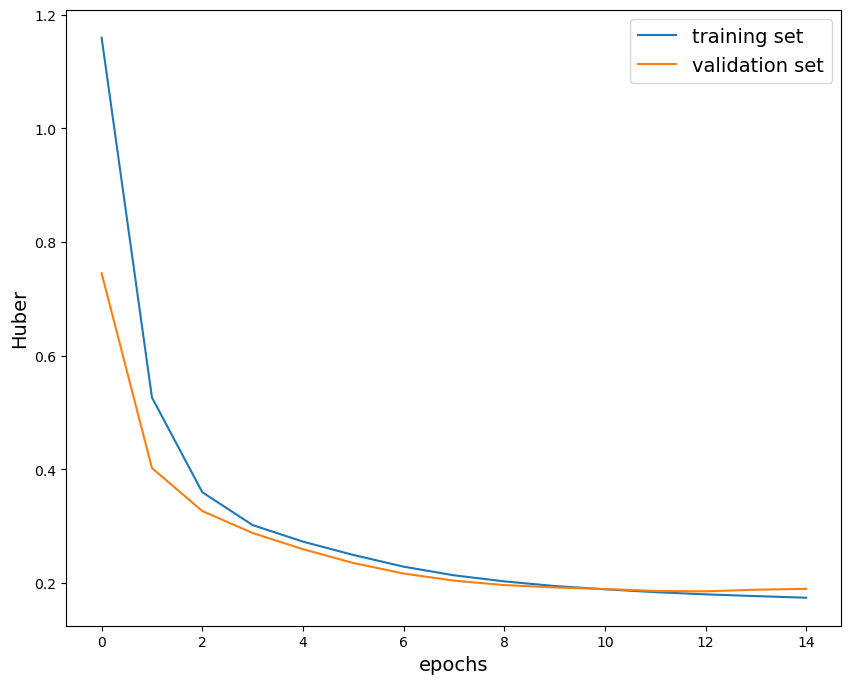

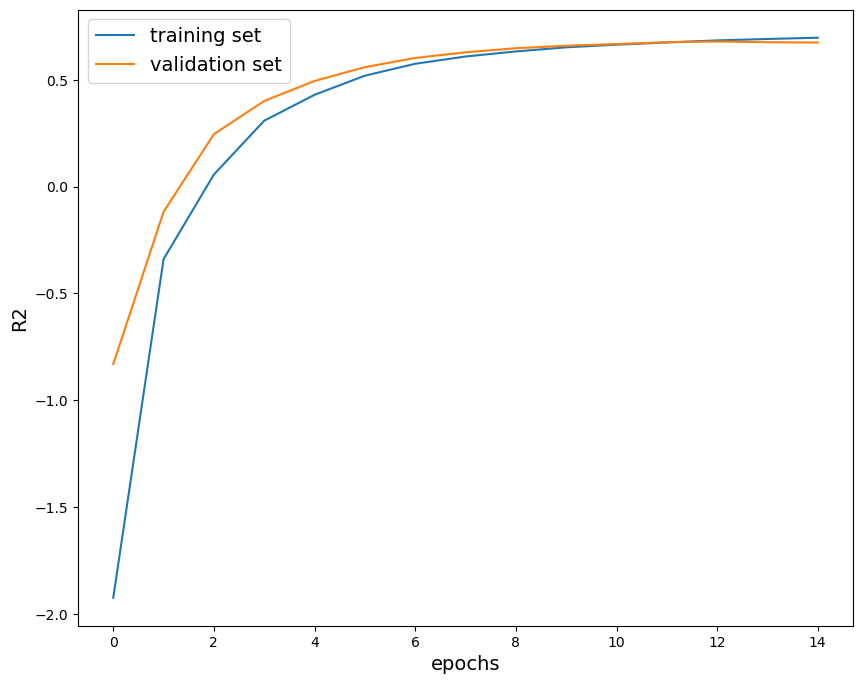

params #26: (0.0001, 128, 0.3)


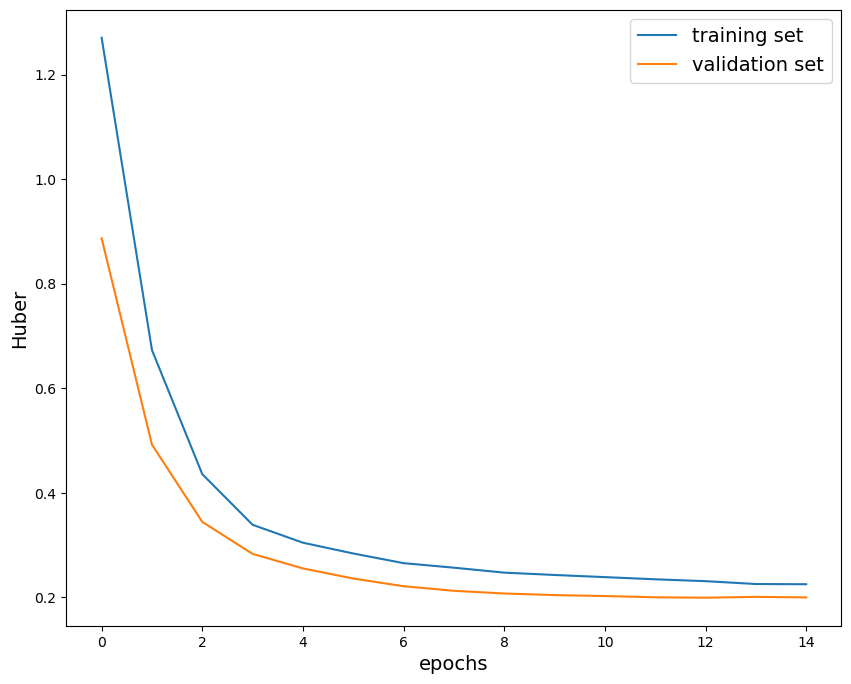

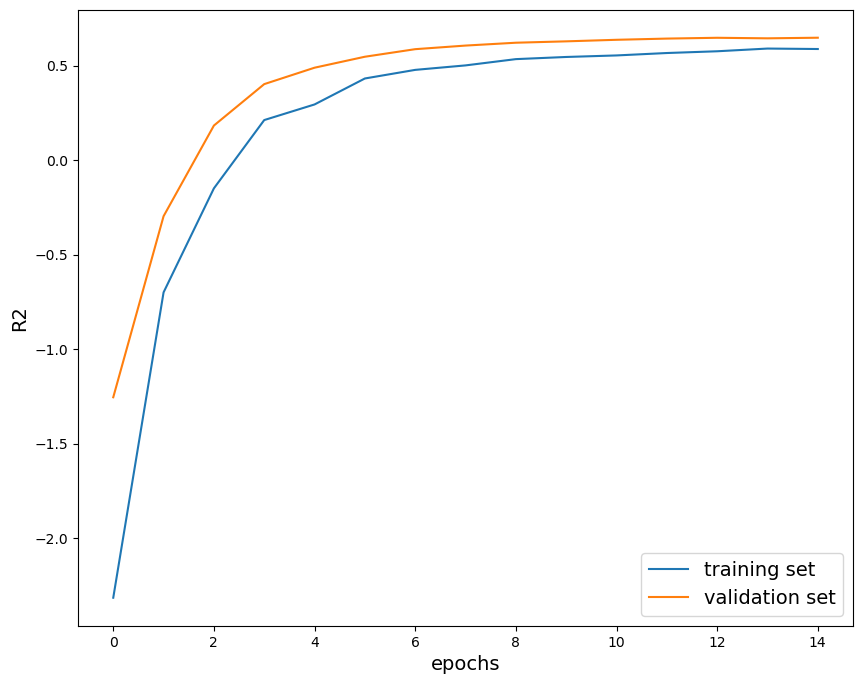

params #27: (0.0001, 128, 0.6)


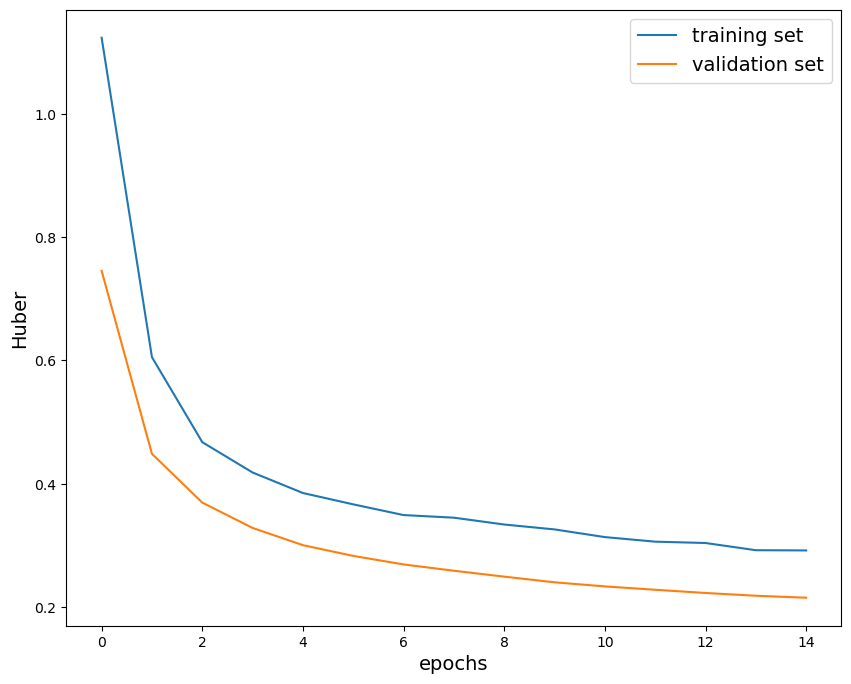

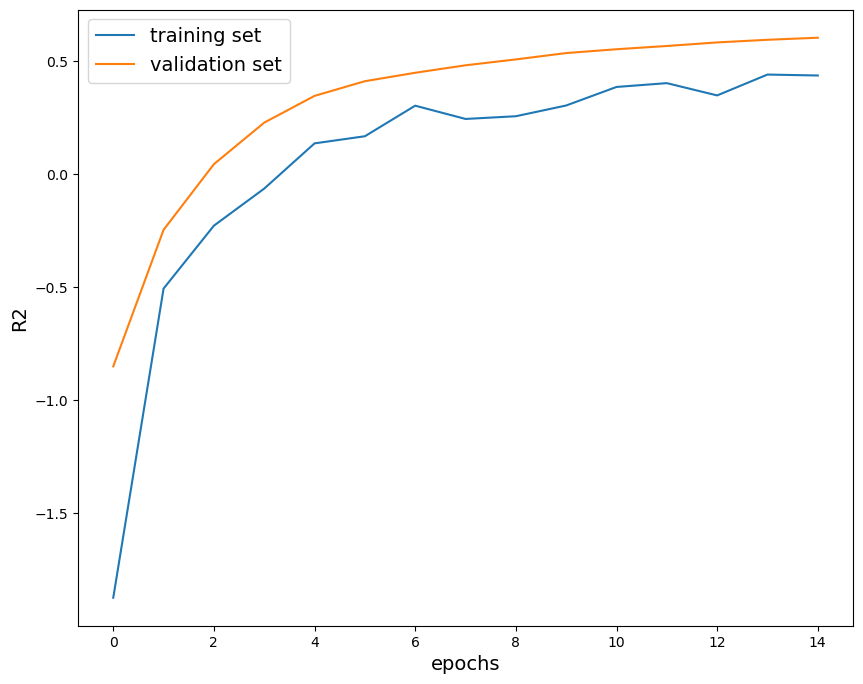

In [11]:
vary_lr = [0.01, 0.001, 0.0001]
vary_hidden_dim = [32, 64, 128]
vary_dropout = [0.0, 0.3, 0.6]

prms_product = list(product(vary_lr, vary_hidden_dim, vary_dropout))
test_metrics_vary = search_hyperparameters(prms_product, cfg, folder, json_manager, device, plot=True)

In [12]:
headers = ["Model", "Validation loss", "Test loss", "Test R2-score"]

metrics = tc.vstack((test_metrics, test_metrics_vary))
load_results("checkpoints", folder, headers, metrics[:, 0], metrics[:, 1])

| Model                  | Validation loss     | Test loss           | Test R2-score        |
| ---------------------- | ------------------- | ------------------- | -------------------- |
| base_model             | 0.20068767666816711 | 0.21348972618579865 | 0.6071388125419617   |
| lr0.001_hdim128_do0.0  | 0.21619577705860138 | 0.610909104347229   | -0.554772138595581   |
| lr0.001_hdim32_do0.3   | 0.20573388040065765 | 0.31399035453796387 | 0.43527424335479736  |
| lr0.0001_hdim128_do0.6 | 0.21522027254104614 | 0.24327532947063446 | -0.36699187755584717 |
| lr0.001_hdim128_do0.6  | 0.19908484816551208 | 0.37595316767692566 | -0.5588181018829346  |
| lr0.0001_hdim32_do0.3  | 0.26216840744018555 | 0.3395382761955261  | -10.37539291381836   |
| lr0.0001_hdim32_do0.6  | 0.2945428192615509  | 0.3878251016139984  | -14.89342975616455   |
| lr0.0001_hdim128_do0.3 | 0.1992618888616562  | 0.2179165482521057  | 0.36683863401412964  |
| lr0.0001_hdim32_do0.0  | 0.23673401772975922 | 0.313646972